## Obtain: pointing and clicking does not scale.
## Scrub: the world is a messy place
## Explore: You can see a lot by looking
## Models: always bad, sometimes ugly
## iNterpret: “The purpose of computing is insight, not numbers.”

The data was obtained from the King's County House Sales Dataset. 
There were numerous null values within the dataset and especially for 
waterfront and year renovated. We predict that a view near the waterfront and
and renovating a house would correlate positively with the price of the house.
Therefore, the people that have renovated a house or a home that is near the 
waterfront would mention that in their listings. Because of this, 
we can confidently replace the null values in Waterfront and year renovated 
zeroes. There were also several question mark values in the sqft_basement 
feature. Its unclear why these values were left as a question mark instead 
of a null and may be a transcription error. For thatt reason, as well as the 
fact that it is only a 400 values, we drop the rows with question marks in the 
set. With that taken care of, there were another 60 nulls on view and we 
decided to drop them.

Data exploration shows that many distributions are skewed like bedrooms,
condition, floors, sqft_basement, sqft_living, and a few others. 
This tells us that it may be beneficial to log normalize the data before 
standardizing.We can also observe that values like sqft_above and zipcode 
have a bimodal distribution and that bathrooms and grade have relatively
normal distributions.During Data Exploration, we also noted some problems with
the formats our datapoints were stored in and converted everything to either
floats or integers with the exception of date which was chagned from object
to datetime. 

We created two models, one that had standardized data for greater accuracy,
and an unstandardized model, that does the same thing done. This is because
the unstandardized model is far more interprable and we can use it to determine
the magnitude of the effect an independent variable will have directly on the 
price in terms people can understand. With the unstandardized model, we can 
see that having a house near the waterfront, on average, holding all
other variables equal, will increase the price of the home by about 64 
thousand dollars. We used our standardized models to see that renovating a 
house can increase the price that it will sell for and the later you do it,
on average, the more it will cost.

Subsequently, I've gone on and improved the model by adding feature interactions, exploring new aspects of the data and intend to work on this as time goes on. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('seaborn')
df = pd.read_csv('kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [2]:
import vtreat


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

Wrote scrips in python to visualize relationship betweeen factors like 

In [6]:
c = []
for i in range(0, len(df)):
    if df.sqft_basement[i]=="?":
        c.append(i)
len(c)
df=df[df.sqft_basement != '?']

In [7]:
len(c)

454

In [8]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.

In [9]:
df['sqft_basement']=df['sqft_basement'].loc[df['sqft_basement']=="?"]=0

E:\Conda2\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
E:\Conda2\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
df['sqft_basement']=df['sqft_basement'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null datetime64[ns]
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [11]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
df['waterfront']=df['waterfront'].fillna(0)
#dropping because if someone has a view of the waterfront, we
#expect that to increase the value of the home so the ones left blank
#likely aren't close to the waterfront

In [13]:
df['yr_renovated']=df['yr_renovated'].fillna(0)
#similar to the reasoning about waterfront, if a home has been renovated
#it is expected to sell for a higher price all other things equal
#therefore if a home has been renovated it would be likely to be referenced. 

In [14]:
df=df.dropna()

In [15]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df.shape

(21082, 21)

In [17]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.108200e+04  2.108200e+04  21082.000000  21082.000000  21082.000000   
mean   4.582793e+09  5.402469e+05      3.372403      2.115916   2080.359975   
std    2.876423e+09  3.667323e+05      0.924996      0.768142    917.856396   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123700e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904970e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.312200e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot       floors    waterfront          view     condition  \
count  2.108200e+04  21082.00000  21082.000000  21082.000000  21082.000000   
mean   1.507759e+04      1.49362      0.006688      0.233327      3.409828   
std    4.117338e+04      0.53937      0.081509      0.765066      0.650597   
min    5.200000e+02      1.00000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.00000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.50000      0.000000      0.000000      3.000000   
75%    1.069775e+04      2.00000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.50000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21082.000000  21082.000000        21082.0  21082.000000  21082.000000   
mean       7.657717   1789.000000            0.0   1971.023337     68.359359   
std        1.173690    828.369355            0.0     29.323120    363.029573   
min        3.000000    370.000000            0.0   1900.000000      0.000000   
25%        7.000000   1200.000000            0.0   1952.000000      0.000000   
50%        7.000000   1560.000000            0.0   1975.000000      0.000000   
75%        8.000000   2210.000000            0.0   1997.000000      0.000000   
max       13.000000   9410.000000            0.0   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21082.000000  21082.000000  21082.000000   21082.000000   21082.000000  
mean   98077.858837     47.560371   -122.213843    1986.917418   12732.514135  
std       53.528769      0.138568      0.140607     685.544250   27148.781580  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471325   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.572200   -122.230000    1840.000000    7626.000000  
75%    98117.000000     47.678200   -122.125000    2360.000000   10088.750000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D225651D0>,
      dtype=object)

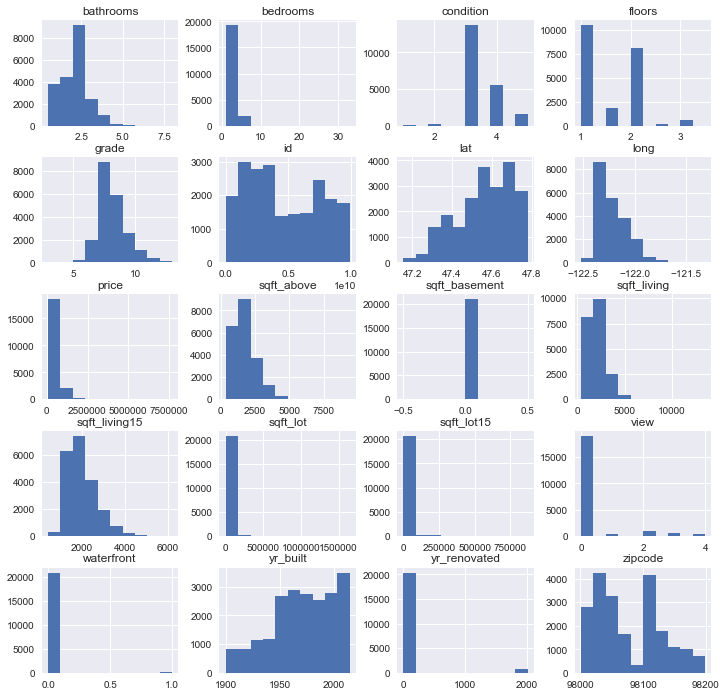

In [18]:
df.hist(figsize=(12,12))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
id               21082 non-null int64
date             21082 non-null datetime64[ns]
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

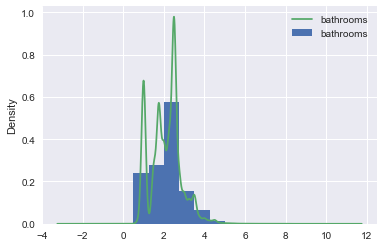

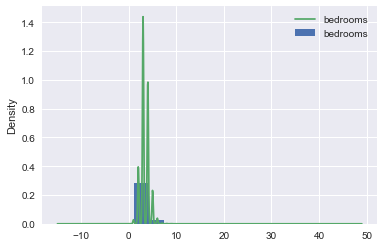

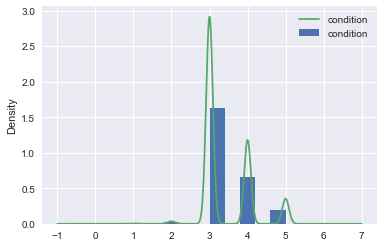

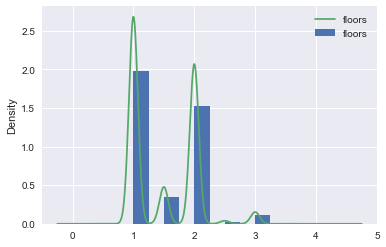

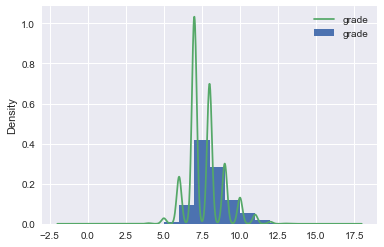

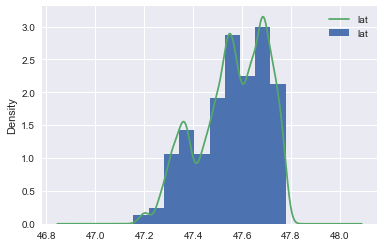

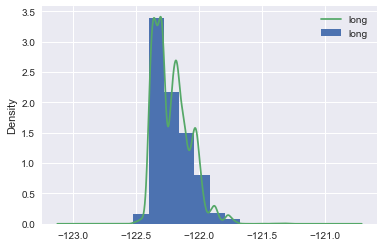

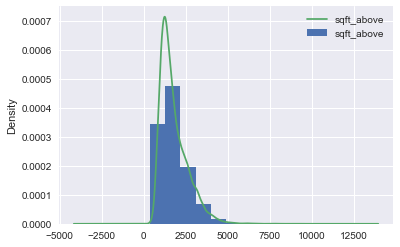

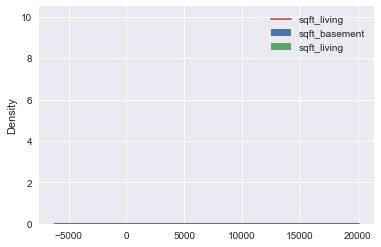

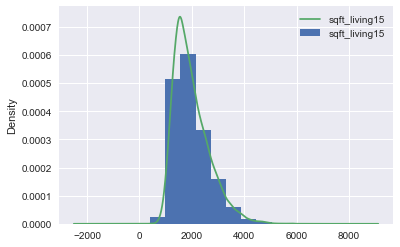

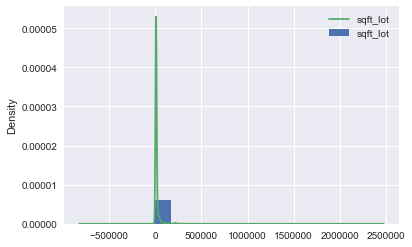

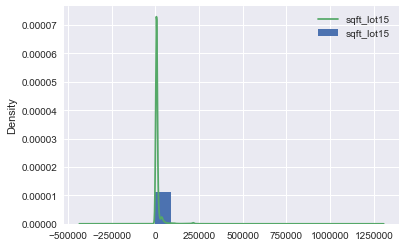

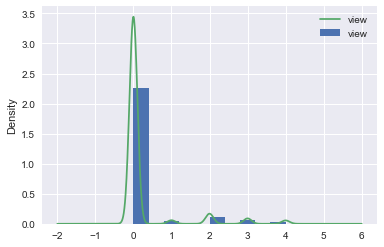

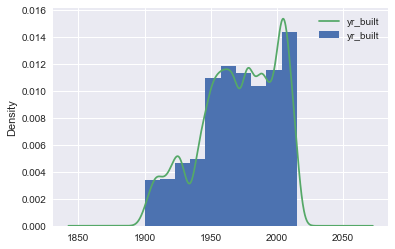

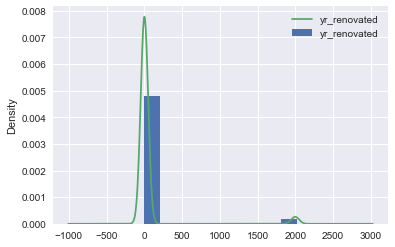

In [20]:
ar = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'yr_built', 'yr_renovated']
for i in range (0, len(ar)):
    try:
        df[ar[i]].plot.hist(density=True)
        df[ar[i]].plot.kde(label=ar[i])
        plt.legend()
        plt.show()
    except:
        continue

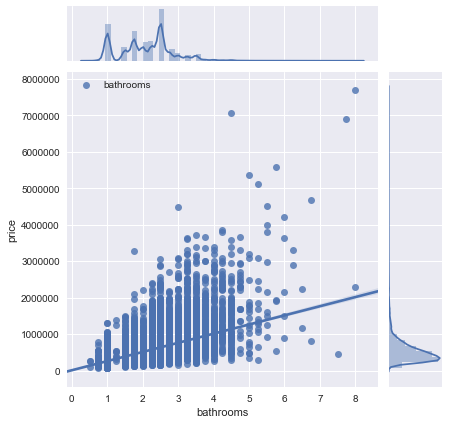

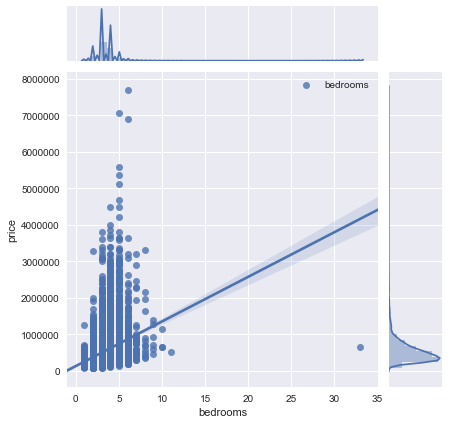

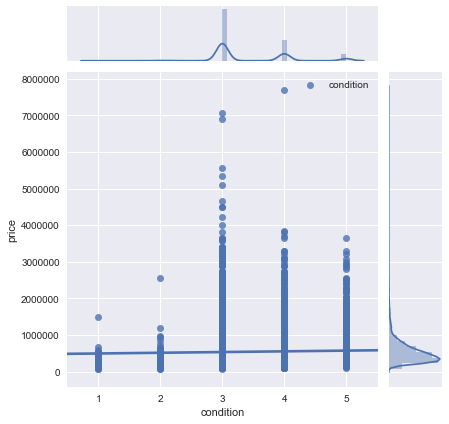

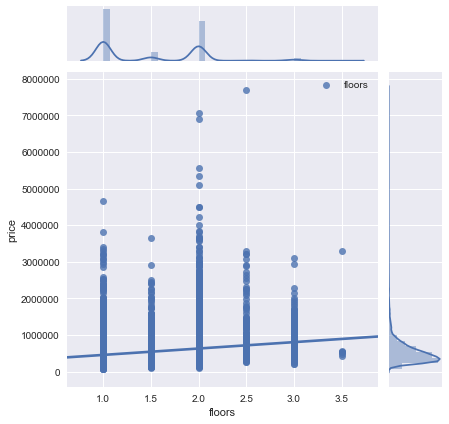

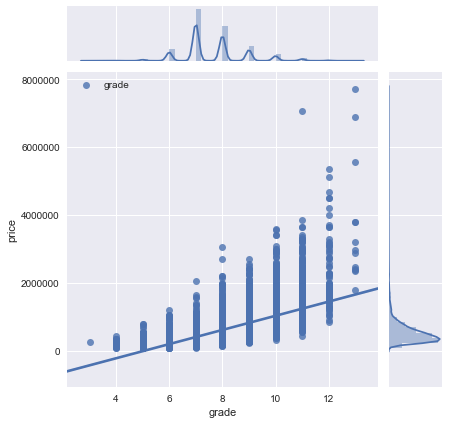

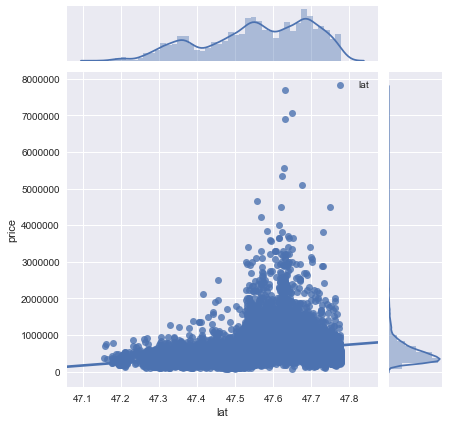

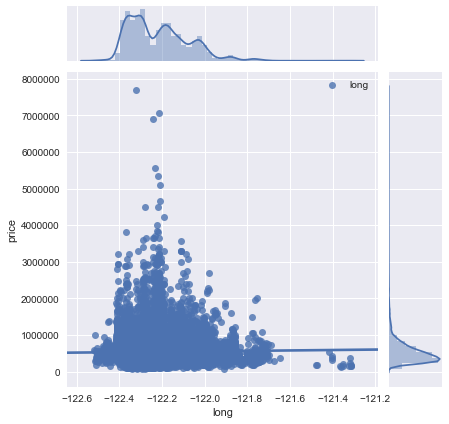

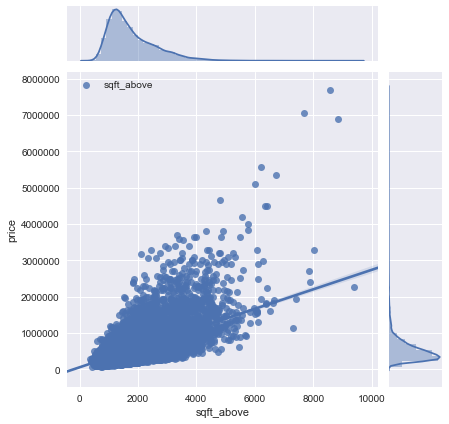

E:\Conda2\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Conda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


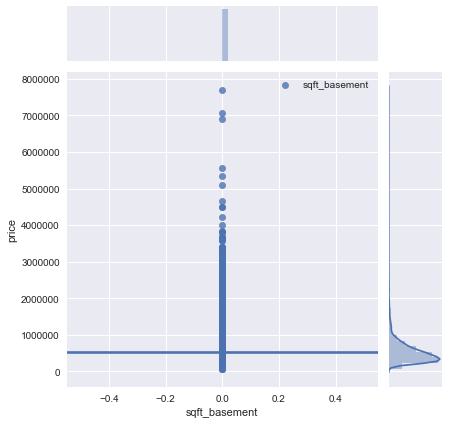

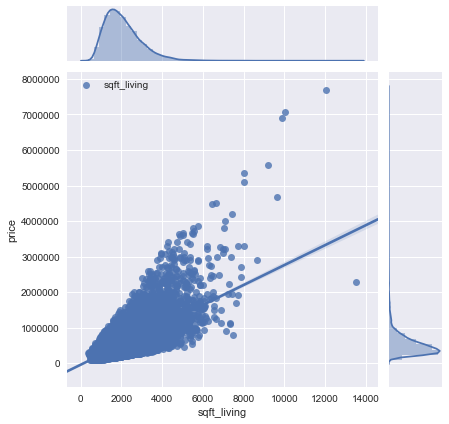

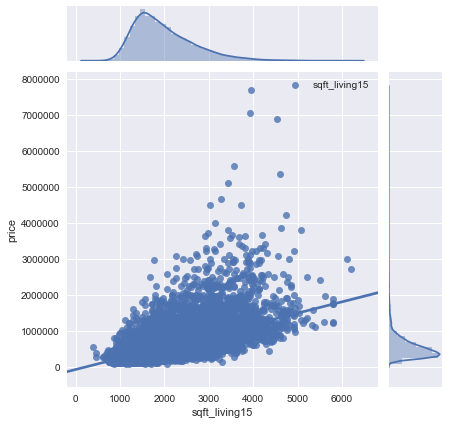

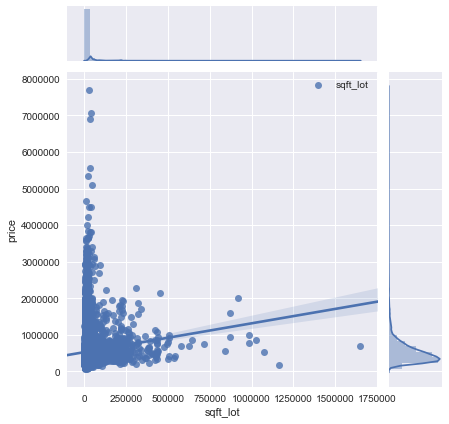

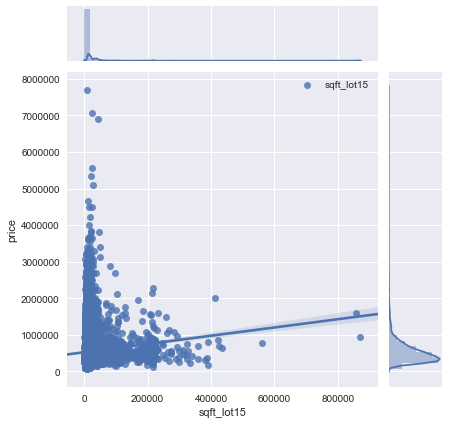

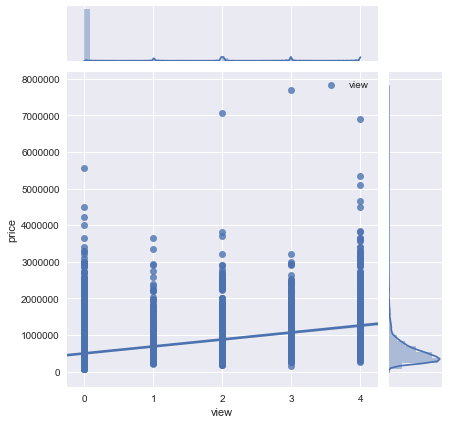

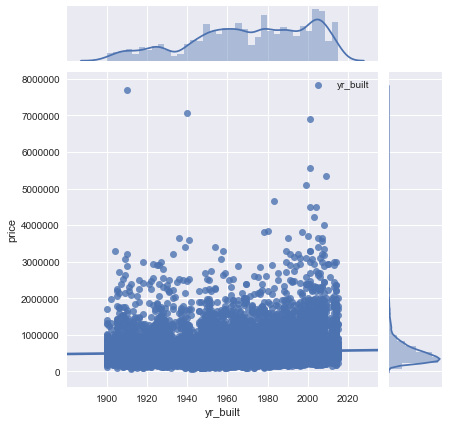

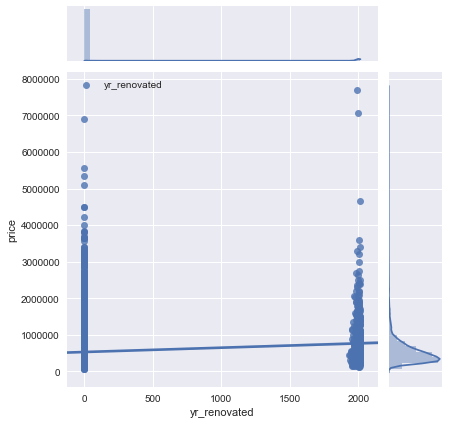

In [21]:
ar = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'yr_built', 'yr_renovated']
for i in range(0, len(ar)):
    sns.jointplot(x=ar[i], y='price',data=df, kind = 'reg', label=ar[i] )
    plt.legend()
    plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
id               21082 non-null int64
date             21082 non-null datetime64[ns]
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [23]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.108200e+04  2.108200e+04  21082.000000  21082.000000  21082.000000   
mean   4.582793e+09  5.402469e+05      3.372403      2.115916   2080.359975   
std    2.876423e+09  3.667323e+05      0.924996      0.768142    917.856396   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123700e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904970e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.312200e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot       floors    waterfront          view     condition  \
count  2.108200e+04  21082.00000  21082.000000  21082.000000  21082.000000   
mean   1.507759e+04      1.49362      0.006688      0.233327      3.409828   
std    4.117338e+04      0.53937      0.081509      0.765066      0.650597   
min    5.200000e+02      1.00000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.00000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.50000      0.000000      0.000000      3.000000   
75%    1.069775e+04      2.00000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.50000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21082.000000  21082.000000        21082.0  21082.000000  21082.000000   
mean       7.657717   1789.000000            0.0   1971.023337     68.359359   
std        1.173690    828.369355            0.0     29.323120    363.029573   
min        3.000000    370.000000            0.0   1900.000000      0.000000   
25%        7.000000   1200.000000            0.0   1952.000000      0.000000   
50%        7.000000   1560.000000            0.0   1975.000000      0.000000   
75%        8.000000   2210.000000            0.0   1997.000000      0.000000   
max       13.000000   9410.000000            0.0   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21082.000000  21082.000000  21082.000000   21082.000000   21082.000000  
mean   98077.858837     47.560371   -122.213843    1986.917418   12732.514135  
std       53.528769      0.138568      0.140607     685.544250   27148.781580  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471325   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.572200   -122.230000    1840.000000    7626.000000  
75%    98117.000000     47.678200   -122.125000    2360.000000   10088.750000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [24]:
df1=df

In [25]:
df['renovated']=df[['yr_renovated']]>0

In [26]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...        1180            0.0   
1      7242     2.0         0.0   0.0  ...        2170            0.0   
2     10000     1.0         0.0   0.0  ...         770            0.0   
3      5000     1.0         0.0   0.0  ...        1050            0.0   
4      8080     1.0         0.0   0.0  ...        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           0.0    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  renovated  
0        5650      False  
1        7639       True  
2        8062      False  
3        5000      False  
4        7503      False  

[5 rows x 22 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 22 columns):
id               21082 non-null int64
date             21082 non-null datetime64[ns]
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
renovated        21082 non-null bool
dtypes: bool(1), datetime64[n

In [28]:
df['waterfront']=df['waterfront'].astype('category')

In [29]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.108200e+04  2.108200e+04  21082.000000  21082.000000  21082.000000   
mean   4.582793e+09  5.402469e+05      3.372403      2.115916   2080.359975   
std    2.876423e+09  3.667323e+05      0.924996      0.768142    917.856396   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123700e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904970e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.312200e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot       floors          view     condition         grade  \
count  2.108200e+04  21082.00000  21082.000000  21082.000000  21082.000000   
mean   1.507759e+04      1.49362      0.233327      3.409828      7.657717   
std    4.117338e+04      0.53937      0.765066      0.650597      1.173690   
min    5.200000e+02      1.00000      0.000000      1.000000      3.000000   
25%    5.040000e+03      1.00000      0.000000      3.000000      7.000000   
50%    7.620000e+03      1.50000      0.000000      3.000000      7.000000   
75%    1.069775e+04      2.00000      0.000000      4.000000      8.000000   
max    1.651359e+06      3.50000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21082.000000        21082.0  21082.000000  21082.000000  21082.000000   
mean    1789.000000            0.0   1971.023337     68.359359  98077.858837   
std      828.369355            0.0     29.323120    363.029573     53.528769   
min      370.000000            0.0   1900.000000      0.000000  98001.000000   
25%     1200.000000            0.0   1952.000000      0.000000  98033.000000   
50%     1560.000000            0.0   1975.000000      0.000000  98065.000000   
75%     2210.000000            0.0   1997.000000      0.000000  98117.000000   
max     9410.000000            0.0   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21082.000000  21082.000000   21082.000000   21082.000000  
mean      47.560371   -122.213843    1986.917418   12732.514135  
std        0.138568      0.140607     685.544250   27148.781580  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471325   -122.328000    1490.000000    5100.000000  
50%       47.572200   -122.230000    1840.000000    7626.000000  
75%       47.678200   -122.125000    2360.000000   10088.750000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [30]:
ar=df.describe().columns.drop(['price'])

In [31]:
ar

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

           id
0     1000102
1  9900000190
0    549834.940285
1    529119.883054
dtype: float64


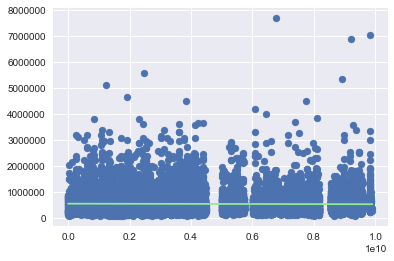

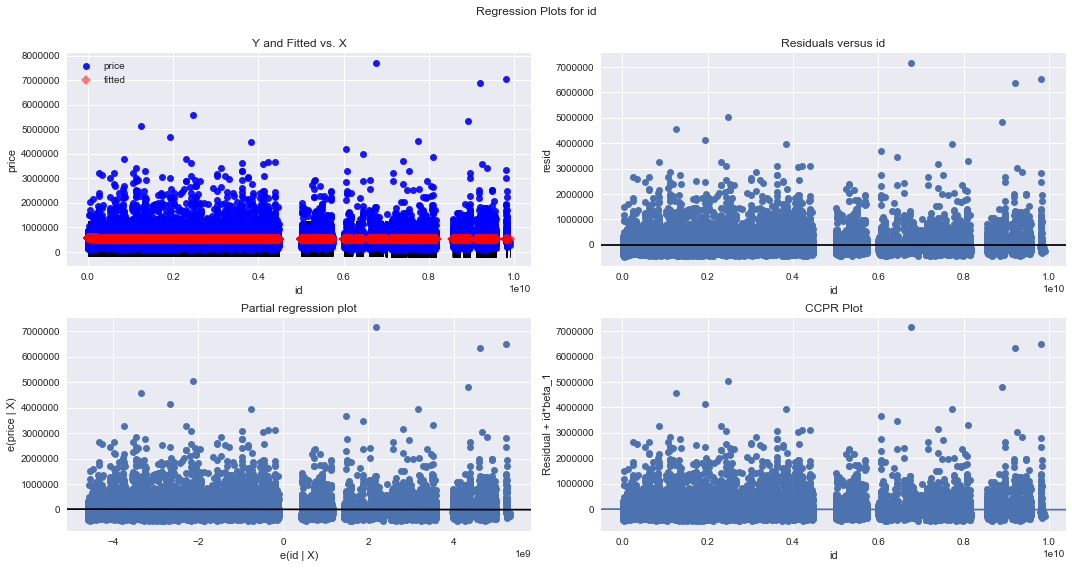

E:\Conda2\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


   bedrooms
0         1
1        33
0    2.501199e+05
1    4.163479e+06
dtype: float64


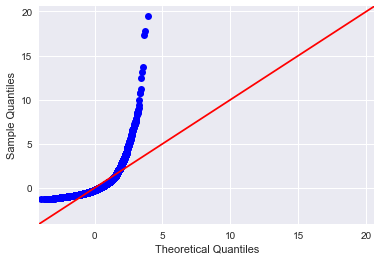

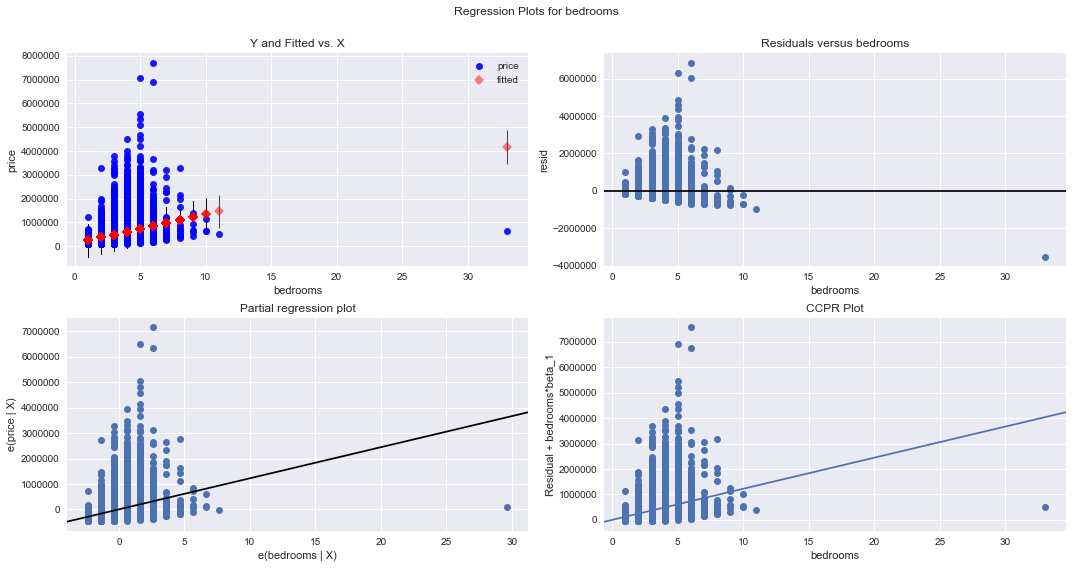

   bathrooms
0        0.5
1        8.0
0    1.351956e+05
1    2.015172e+06
dtype: float64


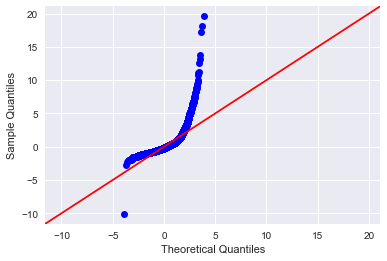

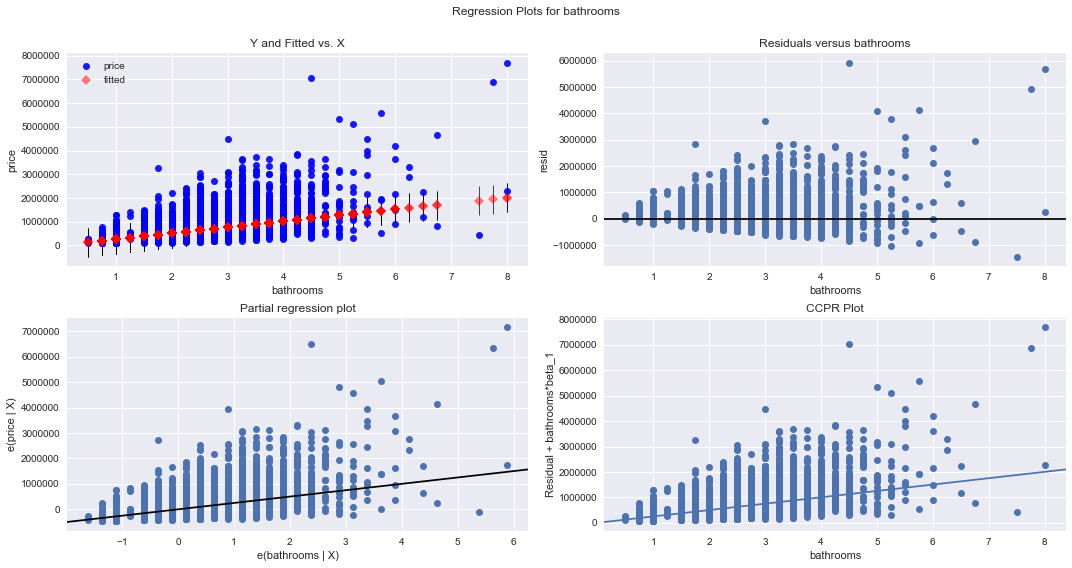

   sqft_living
0          370
1        13540
0    6.051194e+04
1    3.754535e+06
dtype: float64


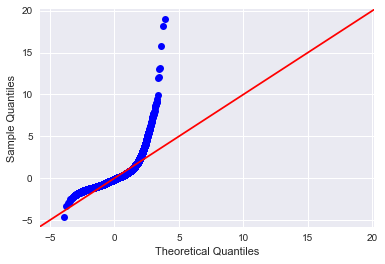

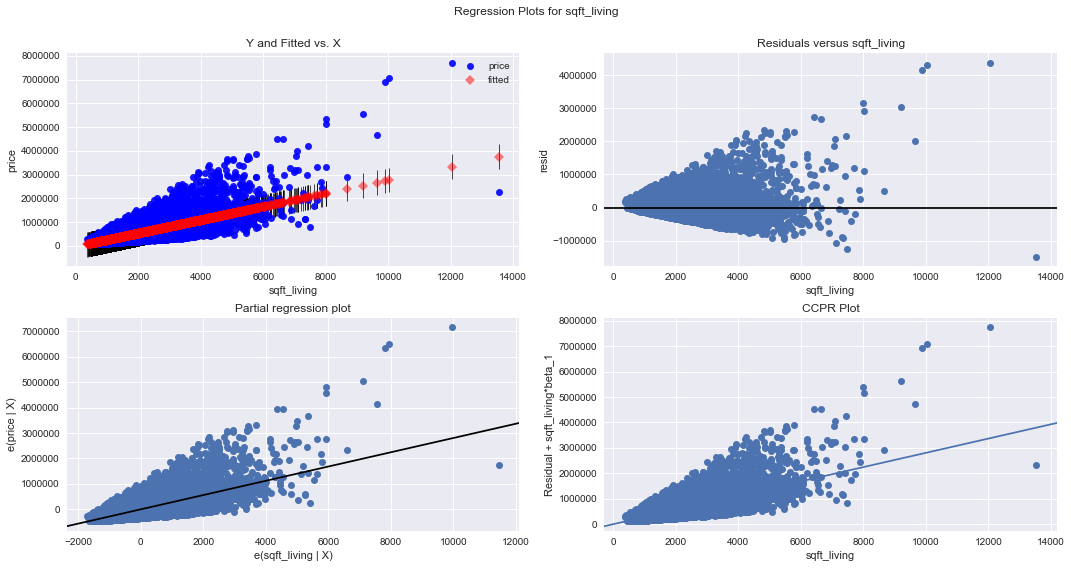

   sqft_lot
0       520
1   1651359
0    5.287846e+05
1    1.828617e+06
dtype: float64


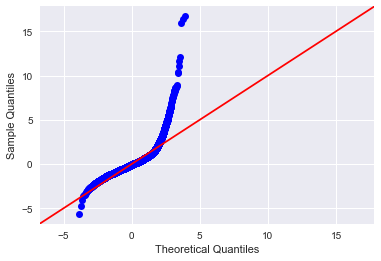

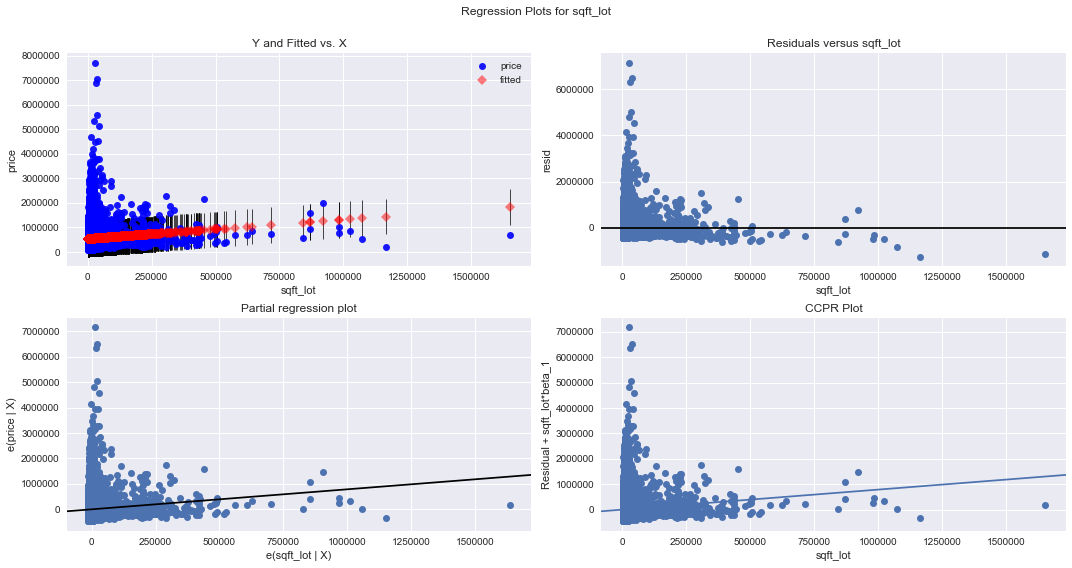

   floors
0     1.0
1     3.5
0    454124.403801
1    890302.336840
dtype: float64


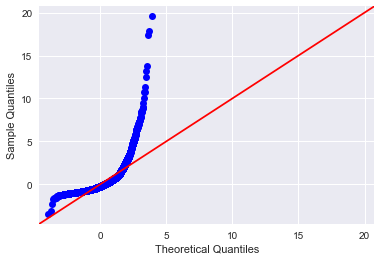

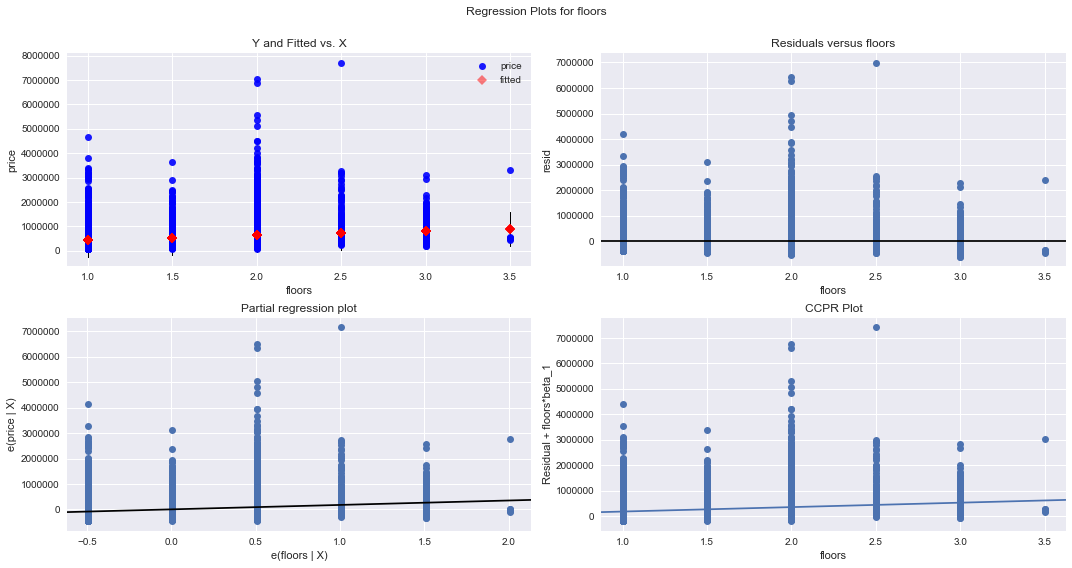

   view
0   0.0
1   4.0
0    4.958248e+05
1    1.257366e+06
dtype: float64


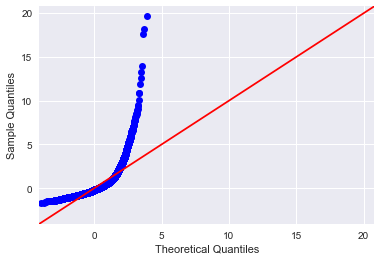

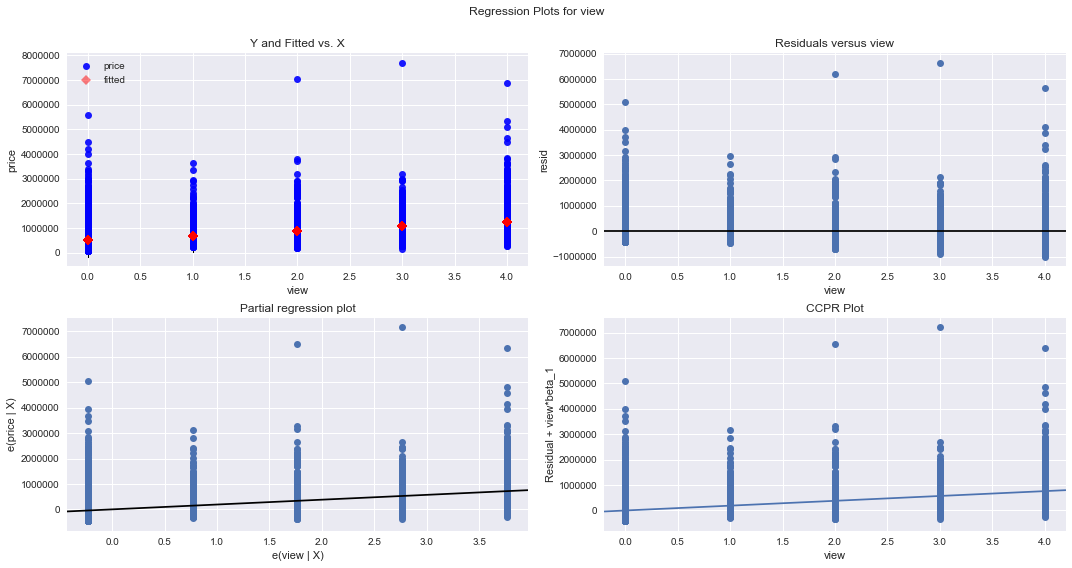

   condition
0          1
1          5
0    493228.974698
1    571272.569723
dtype: float64


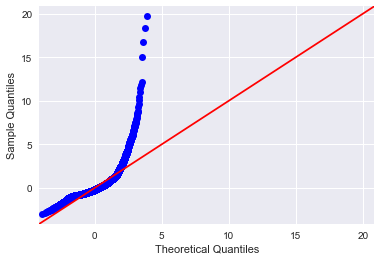

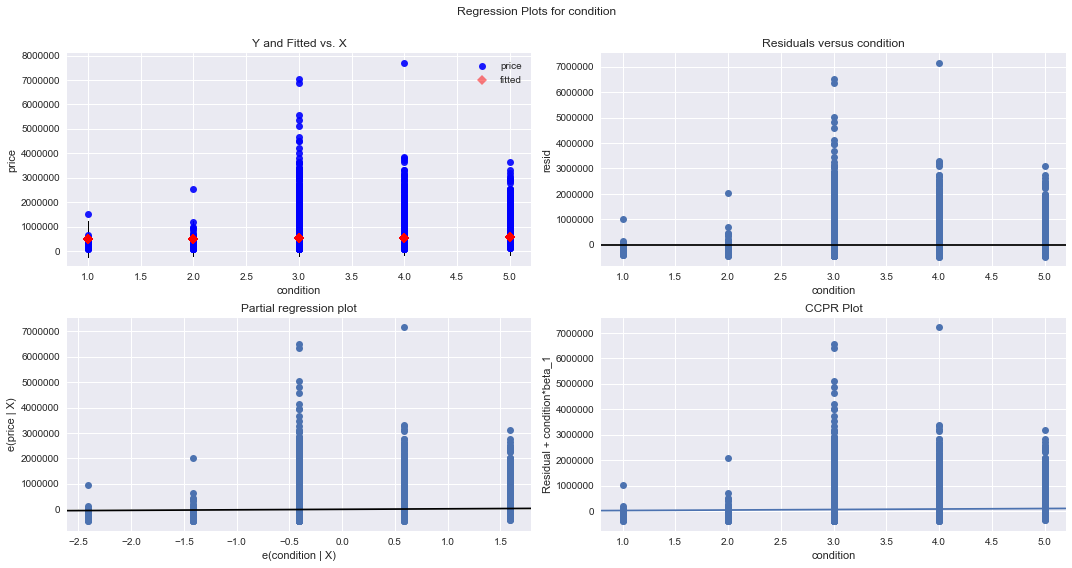

   grade
0      3
1     13
0   -4.320746e+05
1    1.655475e+06
dtype: float64


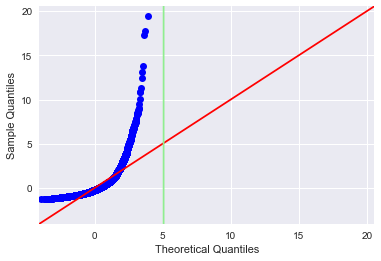

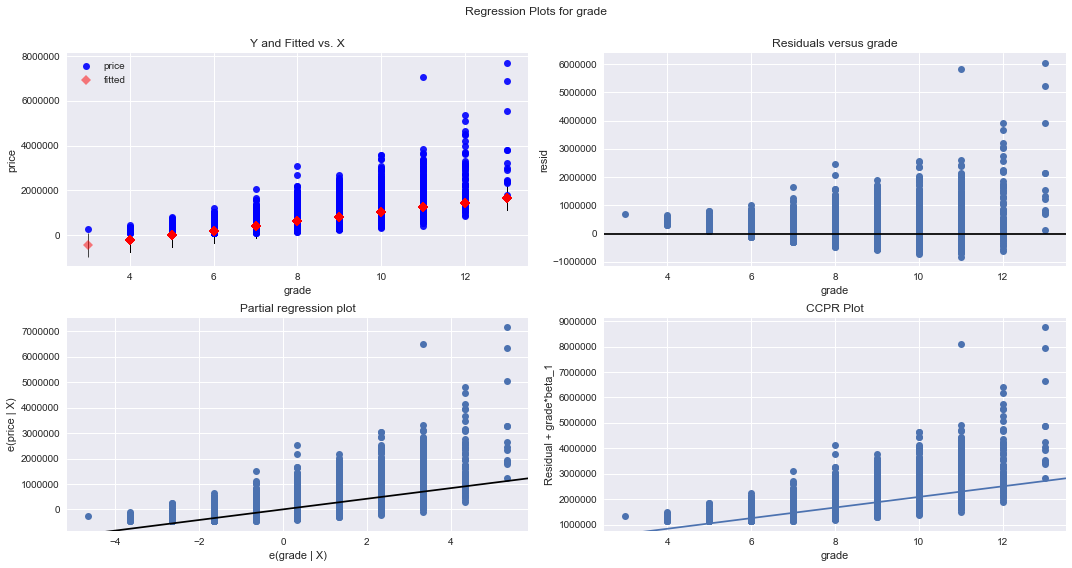

   sqft_above
0         370
1        9410
0    1.598750e+05
1    2.583104e+06
dtype: float64


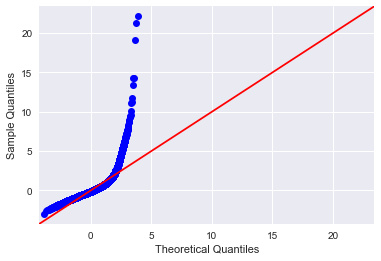

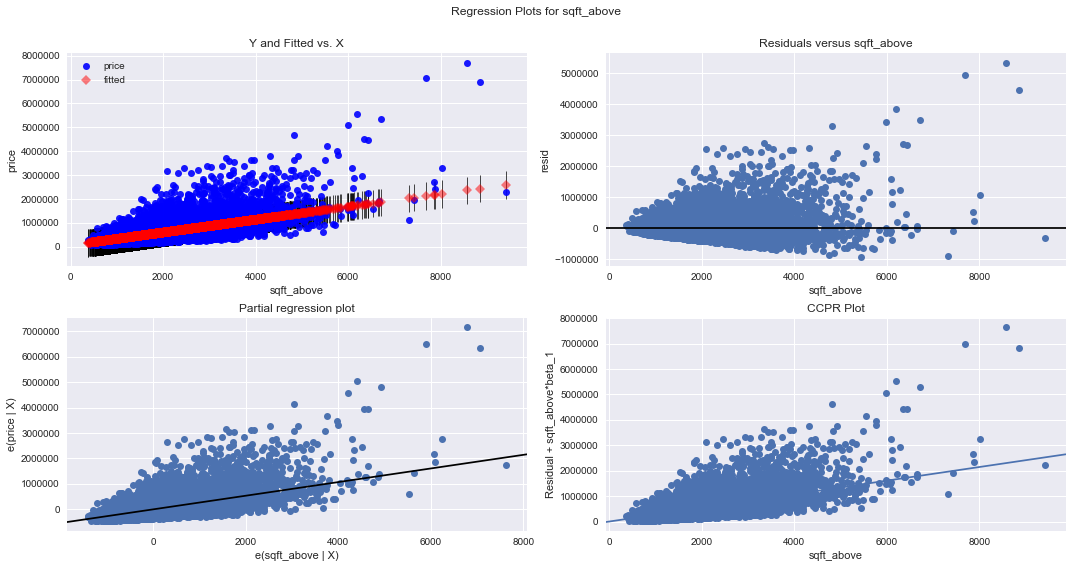

   sqft_basement
0            0.0
1            0.0
0    540246.890475
1    540246.890475
dtype: float64


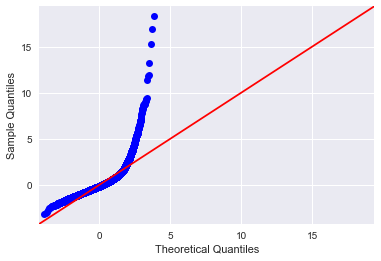

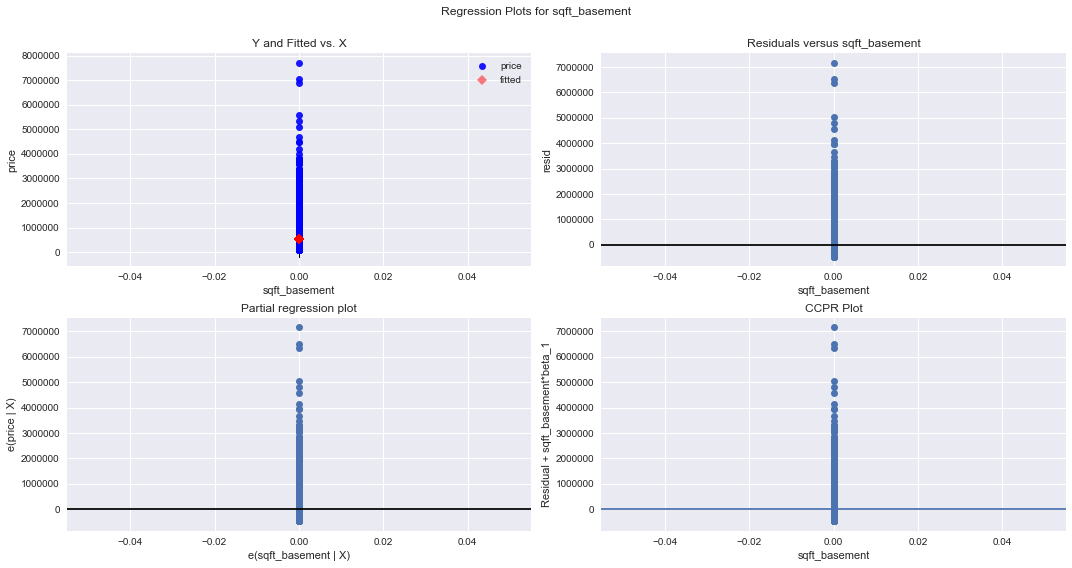

E:\Conda2\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
E:\Conda2\lib\site-packages\statsmodels\regression\linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
E:\Conda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\Conda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\Conda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
E:\Conda2\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


   yr_built
0      1900
1      2015
0    491526.298875
1    570414.003053
dtype: float64


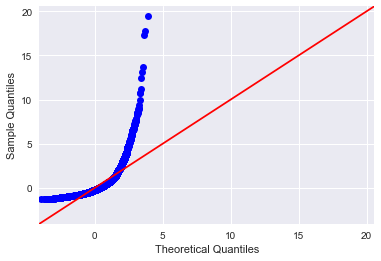

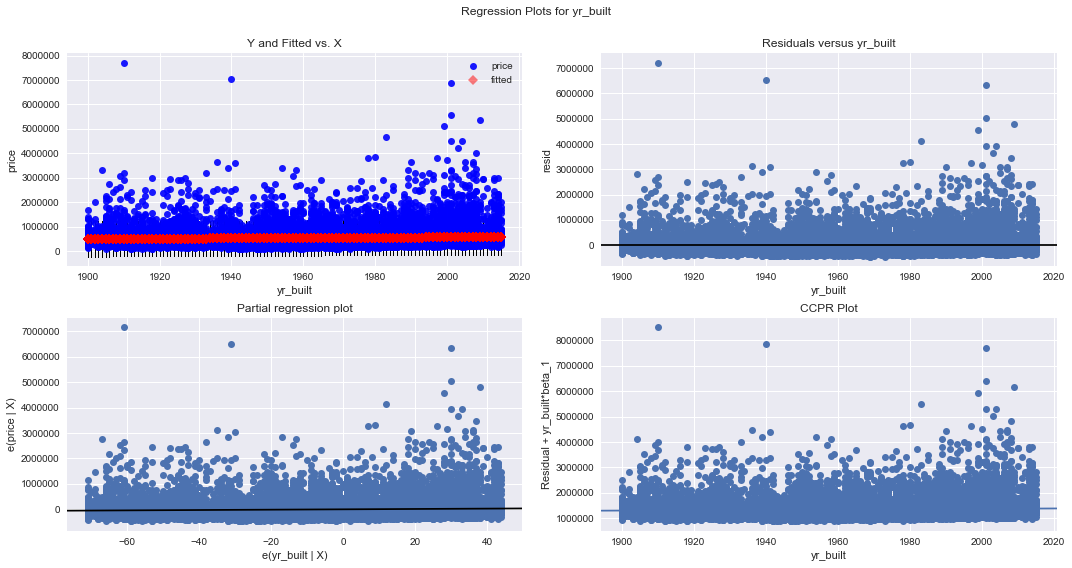

   yr_renovated
0           0.0
1        2015.0
0    532177.901009
1    770024.102103
dtype: float64


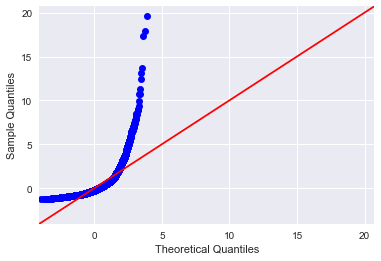

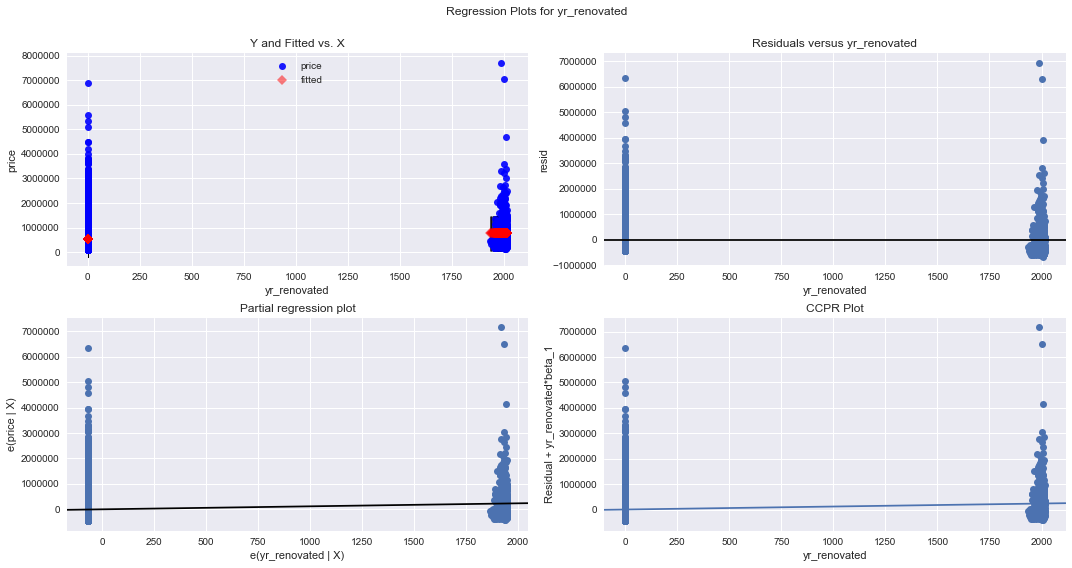

   zipcode
0    98001
1    98199
0    568380.769047
1    495903.638502
dtype: float64


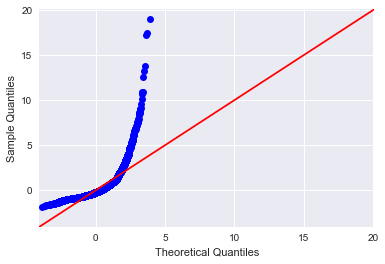

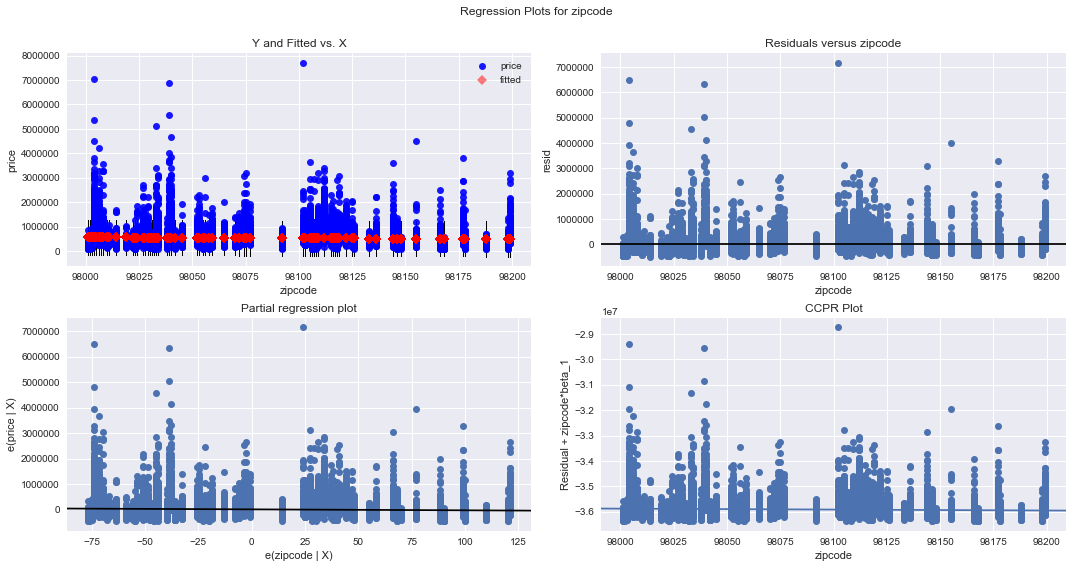

       lat
0  47.1559
1  47.7776
0    210899.254690
1    717129.763591
dtype: float64


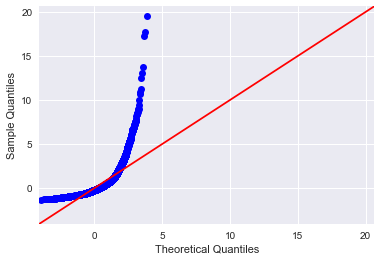

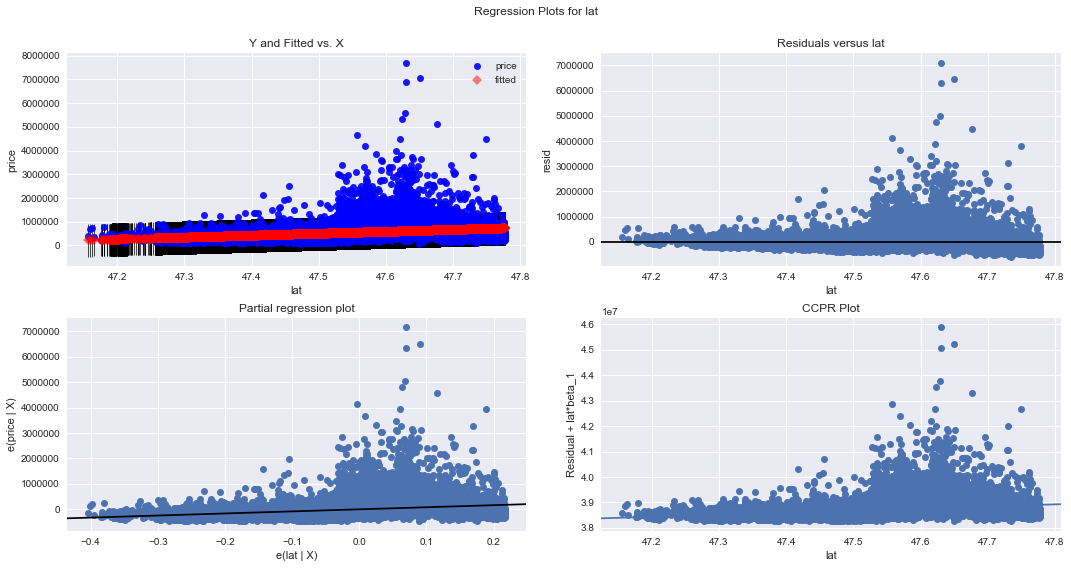

      long
0 -122.519
1 -121.315
0    522329.428382
1    593022.975128
dtype: float64


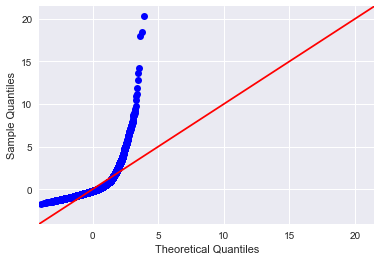

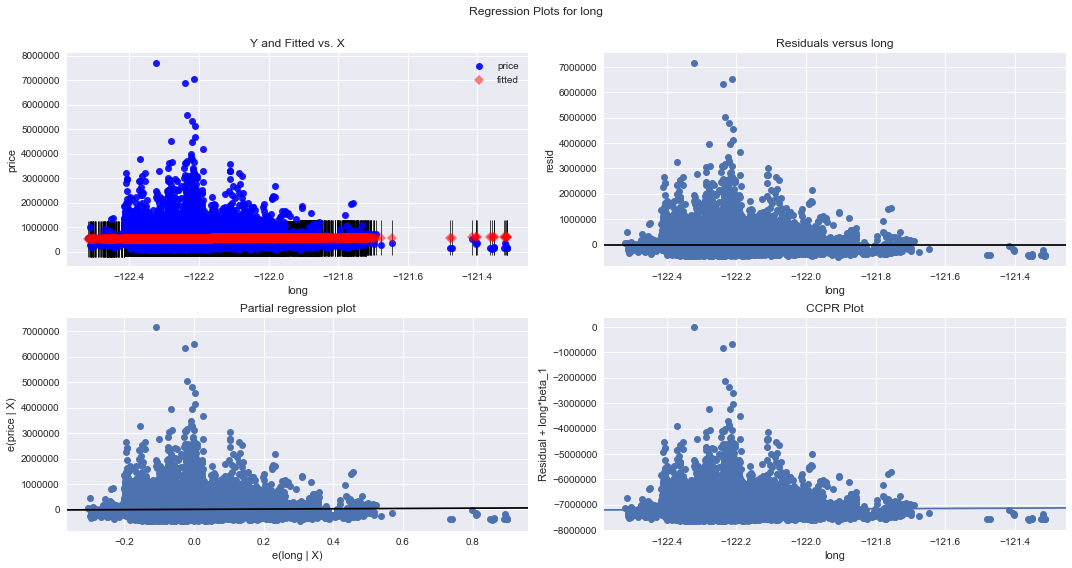

   sqft_living15
0            399
1           6210
0    4.204463e+04
1    1.865221e+06
dtype: float64


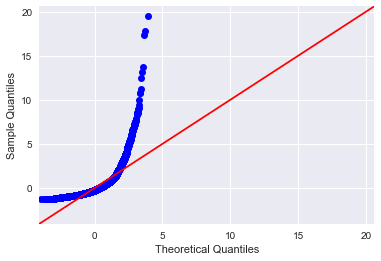

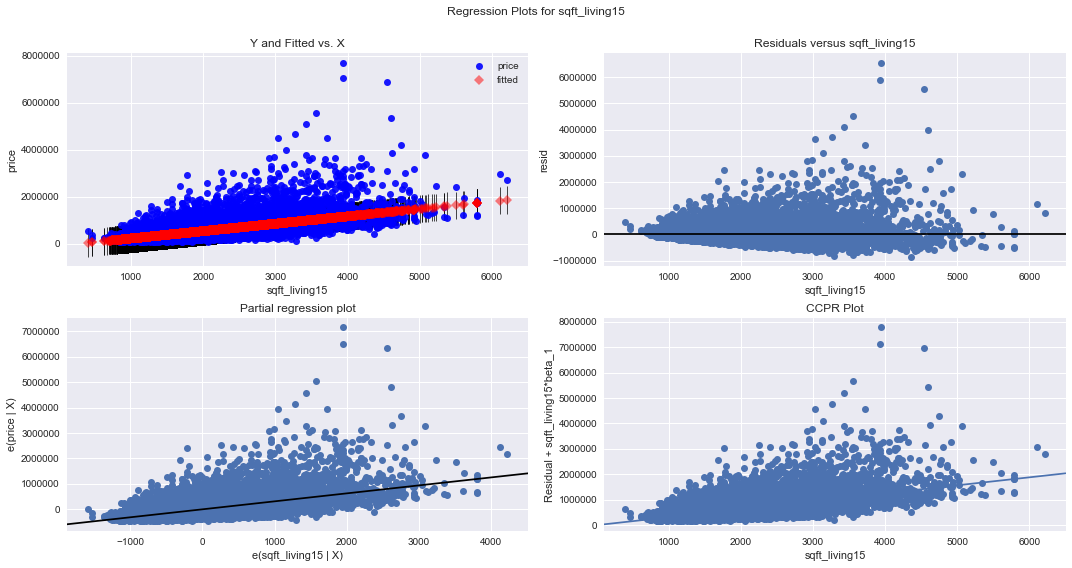

   sqft_lot15
0         651
1      871200
0    5.266147e+05
1    1.508899e+06
dtype: float64


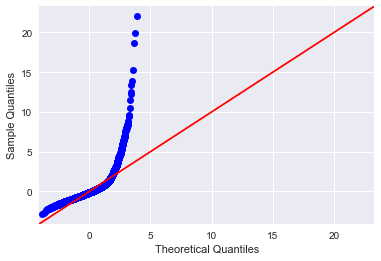

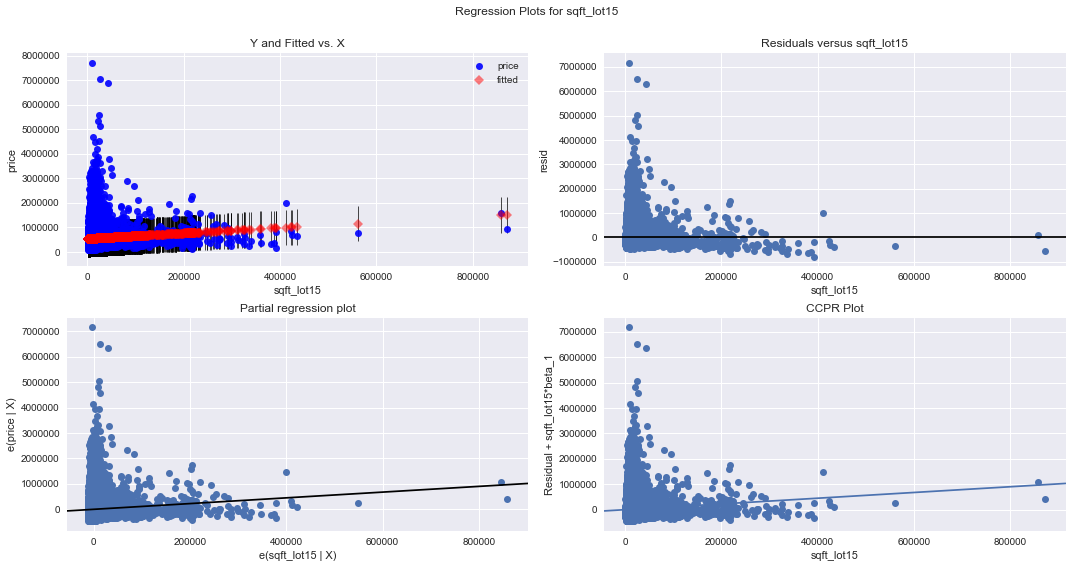

[]


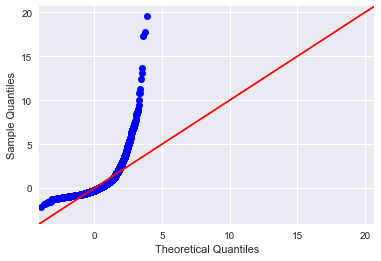

In [32]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
import statsmodels.api as sm
from statsmodels.formula.api import ols
inter = []
jb = []
r2 = []
slope=[]
peas = []
for column in ar:
    f = 'price~'+column
    model = ols(formula=f, data=df).fit()
    df_min_max = pd.DataFrame({column:[df[column].min(), df[column].max()]})
    print(df_min_max)
    preds = model.predict(df_min_max)
    print(preds)
    plt.scatter(df[column], df.price)
    plt.plot(df_min_max, preds, c = 'lightgreen')
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    plt.show()
    model.summary()
    import scipy.stats as stats
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    fig.show()
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    r2.append(model.rsquared)
    peas.append(model.pvalues[1])
    inter.append(model.params[0])
    slope.append(model.params[1])
print(jb)

In [33]:
pd.DataFrame(results)

0            1            2            3            4
0         ind_var    r_squared    intercept        slope      p-value
1              id  0.000269399       549837 -2.09264e-06    0.0171636
2        bedrooms    0.0951438       127827       122292            0
3       bathrooms     0.275655      9863.87       250664            0
4     sqft_living     0.492809     -43268.5      280.488            0
5        sqft_lot   0.00781447       528375     0.787377    7.586e-38
6          floors     0.065845       279653       174471            0
7            view     0.157749       495825       190385            0
8       condition   0.00119806       473718      19510.9  4.98472e-07
9           grade     0.446356 -1.05834e+06       208755            0
10     sqft_above     0.366608      60694.2      268.056            0
11  sqft_basement            0       540247            0          NaN
12       yr_built   0.00300846      -811836       685.98  1.59351e-15
13   yr_renovated     0.013653       532178      118.038  5.54965e-65
14        zipcode   0.00285462  3.64413e+07     -366.046  8.31225e-15
15            lat    0.0946593 -3.81866e+07       814268            0
16           long  0.000506781   7.7161e+06      58715.6   0.00107984
17  sqft_living15     0.343976     -83139.9      313.746            0
18     sqft_lot15   0.00697734       525880      1.12835  5.81826e-34

Text(0.5, 1.0, 'Prices of Houses')

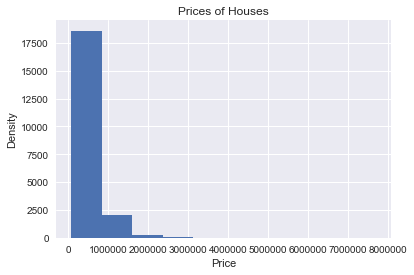

In [34]:
df['price'].hist()
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Prices of Houses')

## Analysis 
Distribution of prices is heavily skewed. May be beneficial to standardize 
all results. 

In [35]:
y = df[['price']]
X = df.drop(['price', 'date'], axis=1)
X.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0  7129300520         3       1.00         1180      5650     1.0        0.0   
1  6414100192         3       2.25         2570      7242     2.0        0.0   
2  5631500400         2       1.00          770     10000     1.0        0.0   
3  2487200875         4       3.00         1960      5000     1.0        0.0   
4  1954400510         3       2.00         1680      8080     1.0        0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7        1180            0.0      1955           0.0   
1   0.0          3      7        2170            0.0      1951        1991.0   
2   0.0          3      6         770            0.0      1933           0.0   
3   0.0          5      7        1050            0.0      1965           0.0   
4   0.0          3      8        1680            0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  renovated  
0    98178  47.5112 -122.257           1340        5650      False  
1    98125  47.7210 -122.319           1690        7639       True  
2    98028  47.7379 -122.233           2720        8062      False  
3    98136  47.5208 -122.393           1360        5000      False  
4    98074  47.6168 -122.045           1800        7503      False

In [36]:
X = df.drop(['price', 'date'], axis=1)

In [37]:
from sklearn.linear_model import LinearRegression as linreg

In [38]:
X.corr()

id  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
id             1.000000  0.002267   0.005873    -0.011866 -0.132412  0.019150   
bedrooms       0.002267  1.000000   0.513694     0.577696  0.032531  0.178518   
bathrooms      0.005873  0.513694   1.000000     0.754793  0.088451  0.503796   
sqft_living   -0.011866  0.577696   0.754793     1.000000  0.173266  0.354260   
sqft_lot      -0.132412  0.032531   0.088451     0.173266  1.000000 -0.007745   
floors         0.019150  0.178518   0.503796     0.354260 -0.007745  1.000000   
view           0.012859  0.080379   0.187249     0.283797  0.072668  0.027748   
condition     -0.023410  0.025652  -0.128167    -0.061626 -0.009207 -0.264259   
grade          0.008765  0.356418   0.665992     0.762719  0.113801  0.459144   
sqft_above    -0.010757  0.478967   0.685959     0.876787  0.183653  0.523594   
sqft_basement       NaN       NaN        NaN          NaN       NaN       NaN   
yr_built       0.022179  0.156820   0.508866     0.319584  0.052469  0.489898   
yr_renovated  -0.009068  0.018345   0.047738     0.049777  0.004297  0.003036   
zipcode       -0.010959 -0.152539  -0.204016    -0.198987 -0.129626 -0.058443   
lat           -0.005062 -0.009939   0.025243     0.053213 -0.085076  0.049237   
long           0.021254  0.131398   0.224660     0.241473  0.230489  0.125360   
sqft_living15 -0.003084  0.391936   0.569396     0.756199  0.143815  0.279379   
sqft_lot15    -0.138114  0.030779   0.089414     0.184920  0.719499 -0.011632   
renovated     -0.009071  0.018082   0.047303     0.049545  0.004396  0.002953   

                   view  condition     grade  sqft_above  sqft_basement  \
id             0.012859  -0.023410  0.008765   -0.010757            NaN   
bedrooms       0.080379   0.025652  0.356418    0.478967            NaN   
bathrooms      0.187249  -0.128167  0.665992    0.685959            NaN   
sqft_living    0.283797  -0.061626  0.762719    0.876787            NaN   
sqft_lot       0.072668  -0.009207  0.113801    0.183653            NaN   
floors         0.027748  -0.264259  0.459144    0.523594            NaN   
view           1.000000   0.045464  0.250014    0.166907            NaN   
condition      0.045464   1.000000 -0.148886   -0.159186            NaN   
grade          0.250014  -0.148886  1.000000    0.756289            NaN   
sqft_above     0.166907  -0.159186  0.756289    1.000000            NaN   
sqft_basement       NaN        NaN       NaN         NaN            NaN   
yr_built      -0.054415  -0.361838  0.448574    0.425170            NaN   
yr_renovated   0.088336  -0.056127  0.015494    0.019099            NaN   
zipcode        0.085300   0.002616 -0.185138   -0.260751            NaN   
lat            0.006174  -0.016021  0.113629   -0.000014            NaN   
long          -0.076306  -0.105805  0.199735    0.344774            NaN   
sqft_living15  0.280934  -0.093556  0.713176    0.730794            NaN   
sqft_lot15     0.072797  -0.004386  0.122404    0.195983            NaN   
renovated      0.088482  -0.055684  0.015140    0.019018            NaN   

               yr_built  yr_renovated   zipcode       lat      long  \
id             0.022179     -0.009068 -0.010959 -0.005062  0.021254   
bedrooms       0.156820      0.018345 -0.152539 -0.009939  0.131398   
bathrooms      0.508866      0.047738 -0.204016  0.025243  0.224660   
sqft_living    0.319584      0.049777 -0.198987  0.053213  0.241473   
sqft_lot       0.052469      0.004297 -0.129626 -0.085076  0.230489   
floors         0.489898      0.003036 -0.058443  0.049237  0.125360   
view          -0.054415      0.088336  0.085300  0.006174 -0.076306   
condition     -0.361838     -0.056127  0.002616 -0.016021 -0.105805   
grade          0.448574      0.015494 -0.185138  0.113629  0.199735   
sqft_above     0.425170      0.019099 -0.260751 -0.000014  0.344774   
sqft_basement       NaN           NaN       NaN       NaN       NaN   
yr_built       1.000000     -0.200252 -0.346743

In [39]:
abs(df.corr())>.75

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id              True  False     False      False        False     False   
price          False   True     False      False        False     False   
bedrooms       False  False      True      False        False     False   
bathrooms      False  False     False       True         True     False   
sqft_living    False  False     False       True         True     False   
sqft_lot       False  False     False      False        False      True   
floors         False  False     False      False        False     False   
view           False  False     False      False        False     False   
condition      False  False     False      False        False     False   
grade          False  False     False      False         True     False   
sqft_above     False  False     False      False         True     False   
sqft_basement  False  False     False      False        False     False   
yr_built       False  False     False      False        False     False   
yr_renovated   False  False     False      False        False     False   
zipcode        False  False     False      False        False     False   
lat            False  False     False      False        False     False   
long           False  False     False      False        False     False   
sqft_living15  False  False     False      False         True     False   
sqft_lot15     False  False     False      False        False     False   
renovated      False  False     False      False        False     False   

               floors   view  condition  grade  sqft_above  sqft_basement  \
id              False  False      False  False       False          False   
price           False  False      False  False       False          False   
bedrooms        False  False      False  False       False          False   
bathrooms       False  False      False  False       False          False   
sqft_living     False  False      False   True        True          False   
sqft_lot        False  False      False  False       False          False   
floors           True  False      False  False       False          False   
view            False   True      False  False       False          False   
condition       False  False       True  False       False          False   
grade           False  False      False   True        True          False   
sqft_above      False  False      False   True        True          False   
sqft_basement   False  False      False  False       False          False   
yr_built        False  False      False  False       False          False   
yr_renovated    False  False      False  False       False          False   
zipcode         False  False      False  False       False          False   
lat             False  False      False  False       False          False   
long            False  False      False  False       False          False   
sqft_living15   False  False      False  False       False          False   
sqft_lot15      False  False      False  False       False          False   
renovated       False  False      False  False       False          False   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
id                False         False    False  False  False          False   
price             False         False    False  False  False          False   
bedrooms          False         False    False  False  False          False   
bathrooms         False         False    False  False  False          False   
sqft_living       False         False    False  False  False           True   
sqft_lot          False         False    False  False  False          False   
floors            False         False    False  False  False          False   
view              False         False    False  False  False          False   
condition         False         False    False  False  False          False   
grade             False         Fa

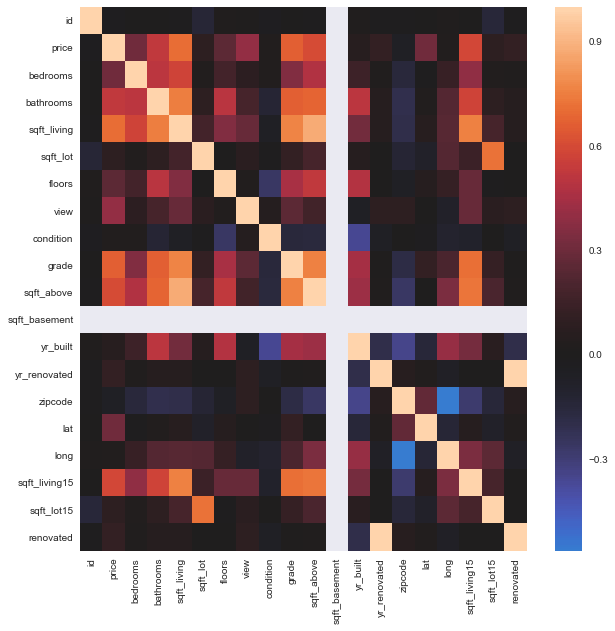

In [40]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), center=0)

Text(0, 0.5, 'bathrooms')

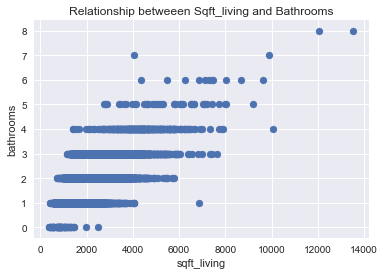

In [41]:
a = df.sqft_living
b = df.bathrooms
plt.scatter(a, b.astype(int))
plt.title('Relationship betweeen Sqft_living and Bathrooms')
plt.xlabel('sqft_living')
plt.ylabel('bathrooms')

## Analysis
Scatterplot displays high a high degree of correlation between the two independent variables. 
Likely best to drop one of them. 

In [42]:
drop_test = df.drop(['sqft_living15', 'sqft_lot15', 'floors'], axis=1)

In [43]:
ar1=drop_test.columns

In [44]:
drop_test.price

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1230000.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
30        580500.0
31        280000.0
32        687500.0
           ...    
21565     625000.0
21566     490000.0
21567     399950.0
21568     380000.0
21569     270000.0
21570     505000.0
21571     385000.0
21572     414500.0
21573     347500.0
21574    1220000.0
21575     572000.0
21576     475000.0
21577    1090000.0
21578     350000.0
21579     520000.0
21580     679950.0
21582     541800.0
21583     810000.0
21584    1540000.0
21585     467000.0
21586     224000.0
21587     50

In [45]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int.astype(float)).fit()

E:\Conda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2601.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:58:31   Log-Likelihood:            -2.8729e+05
No. Observations:               21082   AIC:                         5.746e+05
Df Residuals:                   21062   BIC:                         5.748e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.51e+06   2.96e+06      2.541      0.011    1.72e+06    1.33e+07
id            -1.236e-06   4.87e-07     -2.539      0.011   -2.19e-06   -2.82e-07
bedrooms      -3.601e+04   1918.532    -18.771      0.000   -3.98e+04   -3.23e+04
bathrooms      3.982e+04   3295.272     12.084      0.000    3.34e+04    4.63e+04
sqft_living     148.7611      4.436     33.532      0.000     140.065     157.457
sqft_lot          0.1120      0.049      2.297      0.022       0.016       0.208
floors         7838.7662   3635.956      2.156      0.031     712.013     1.5e+04
waterfront     6.067e+05   1.84e+04     32.976      0.000    5.71e+05    6.43e+05
view           5.586e+04   2142.945     26.066      0.000    5.17e+04    6.01e+04
condition       2.77e+04   2369.349     11.693      0.000    2.31e+04    3.23e+04
grade          9.599e+04   2179.741     44.038      0.000    9.17e+04       1e+05
sqft_above       32.4621      4.400      7.378      0.000      23.838      41.086
sqft_basement  8.814e-08   3.37e-08      2.615      0.009    2.21e-08    1.54e-07
yr_built      -2627.4591     72.654    -36.164      0.000   -2769.866   -2485.052
yr_renovated   3503.8384    486.904      7.196      0.000    2549.470    4458.207
zipcode        -591.7839     33.271    -17.787      0.000    -656.998    -526.570
lat            6.014e+05   1.08e+04     55.534      0.000     5.8e+05    6.23e+05
long          -2.162e+05   1.33e+04    -16.265      0.000   -2.42e+05    -1.9e+05
sqft_living15    22.3290      3.474      6.427      0.000      15.519      29.139
sqft_lot15       -0.3964      0.075     -5.311      0.000      -0.543      -0.250
renovated     -6.946e+06   9.72e+05     -7.147      0.000   -8.85e+06   -5.04e+06
==============================================================================
Omnibus:                    17864.143   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1810517.733
Skew:                           3.544   Prob(JB):                         0.00
Kurtosis:                      47.843   Cond. No.                     9.72e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.53e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [48]:
result = stepwise_selection(X_int.astype(float), y, verbose = True)
print('resulting features:')
print(result)

E:\Conda2\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
E:\Conda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\Conda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\Conda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Add  sqft_above                     with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  const                          with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat                            with p-value 0.0
Add  view                           with p-value 2.10476e-153
Add  bedrooms                       with p-value 5.97109e-45
Add  bathrooms                      with p-value 2.73696e-52
Add  zipcode                        with p-value 1.62193e-35
Add  long                           with p-value 6.59791e-68
Add  condition                      with p-value 5.55869e-25
Add  yr_renovated                   with p-value 1.36033e-09
Drop const                          with p-value 0.0890995
Add  renovated                      with p-value 1.32108e-12


E:\Conda2\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  sqft_lot15                     with p-value 7.62541e-07
Add  id                             with p-value 0.00813025
resulting features:
['sqft_above', 'yr_built', 'sqft_living15', 'waterfront', 'grade', 'sqft_living', 'lat', 'view', 'bedrooms', 'bathrooms', 'zipcode', 'long', 'condition', 'yr_renovated', 'renovated', 'sqft_lot15', 'id']


In [49]:
X_fin = X[['lat', 'view', 'bathrooms', 'grade', 'sqft_living', 'yr_built', 'waterfront', 'bedrooms', 'zipcode', 'long', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'renovated', 'sqft_living15', 'sqft_lot15', 'id']]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y, X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2905.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:58:34   Log-Likelihood:            -2.8730e+05
No. Observations:               21082   AIC:                         5.746e+05
Df Residuals:                   21064   BIC:                         5.748e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.731e+06   2.91e+06      2.315      0.021    1.03e+06    1.24e+07
lat            6.024e+05   1.08e+04     55.833      0.000    5.81e+05    6.24e+05
view           5.612e+04   2141.715     26.202      0.000    5.19e+04    6.03e+04
bathrooms      4.174e+04   3175.849     13.144      0.000    3.55e+04     4.8e+04
grade           9.65e+04   2170.849     44.453      0.000    9.22e+04    1.01e+05
sqft_living     146.1134      4.219     34.628      0.000     137.843     154.384
yr_built      -2602.0957     70.925    -36.688      0.000   -2741.114   -2463.077
waterfront     6.061e+05   1.84e+04     32.942      0.000     5.7e+05    6.42e+05
bedrooms      -3.622e+04   1917.695    -18.889      0.000      -4e+04   -3.25e+04
zipcode        -585.0561     33.129    -17.660      0.000    -649.991    -520.121
long          -2.164e+05   1.32e+04    -16.382      0.000   -2.42e+05   -1.91e+05
condition      2.729e+04   2364.946     11.541      0.000    2.27e+04    3.19e+04
sqft_above       36.8313      3.948      9.328      0.000      29.092      44.570
sqft_basement -2.198e-08   1.22e-08     -1.798      0.072   -4.59e-08    1.99e-09
yr_renovated   3472.7334    486.878      7.133      0.000    2518.415    4427.052
renovated     -6.883e+06   9.72e+05     -7.083      0.000   -8.79e+06   -4.98e+06
sqft_living15    20.9978      3.446      6.093      0.000      14.243      27.752
sqft_lot15       -0.2872      0.054     -5.281      0.000      -0.394      -0.181
id            -1.287e-06   4.86e-07     -2.647      0.008   -2.24e-06   -3.34e-07
==============================================================================
Omnibus:                    17788.997   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1779644.486
Skew:                           3.523   Prob(JB):                         0.00
Kurtosis:                      47.456   Cond. No.                     2.07e+26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

from sklearn.model_selection import train_test_split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)

In [51]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16865 4217 16865 4217


In [52]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [54]:
train_residuals = y_hat_train-y_train
test_residuals = y_hat_test - y_test

In [55]:
test_residuals.head()

price
2157   269275.459990
6412   103692.908250
7317   206629.148159
13024  209163.241994
11100  -87098.641150

In [56]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

53777398342.32986

In [57]:
X_fin = df[['sqft_living15', 'waterfront', 'sqft_living', 'yr_built', 'lat', 'grade', 'view', 'bedrooms', 'condition', 'long', 'sqft_basement', 'sqft_above', 'yr_renovated','bathrooms', 'renovated', 'sqft_lot15', 'zipcode']]
X_int = sm.add_constant(X_fin)

E:\Conda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
model = sm.OLS(y, X_int.astype(float)).fit()
model.summary() #removing bathrooms

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     3086.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:58:38   Log-Likelihood:            -2.8730e+05
No. Observations:               21082   AIC:                         5.746e+05
Df Residuals:                   21065   BIC:                         5.748e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.496e+06   2.91e+06      2.235      0.025    7.99e+05    1.22e+07
sqft_living15    21.0415      3.446      6.105      0.000      14.286      27.797
waterfront     6.064e+05   1.84e+04     32.959      0.000     5.7e+05    6.42e+05
sqft_living     146.1532      4.220     34.633      0.000     137.882     154.425
yr_built      -2601.3541     70.935    -36.673      0.000   -2740.391   -2462.317
lat            6.028e+05   1.08e+04     55.865      0.000    5.82e+05    6.24e+05
grade          9.638e+04   2170.658     44.400      0.000    9.21e+04    1.01e+05
view           5.596e+04   2141.190     26.134      0.000    5.18e+04    6.02e+04
bedrooms      -3.624e+04   1917.960    -18.894      0.000      -4e+04   -3.25e+04
condition      2.741e+04   2364.851     11.592      0.000    2.28e+04     3.2e+04
long          -2.182e+05   1.32e+04    -16.534      0.000   -2.44e+05   -1.92e+05
sqft_basement -7.804e-09   2.95e-09     -2.641      0.008   -1.36e-08   -2.01e-09
sqft_above       36.9581      3.949      9.360      0.000      29.219      44.698
yr_renovated   3476.3201    486.946      7.139      0.000    2521.869    4430.771
bathrooms      4.173e+04   3176.293     13.137      0.000    3.55e+04     4.8e+04
renovated      -6.89e+06   9.72e+05     -7.089      0.000    -8.8e+06   -4.99e+06
sqft_lot15       -0.2662      0.054     -4.946      0.000      -0.372      -0.161
zipcode        -585.1082     33.134    -17.659      0.000    -650.053    -520.164
==============================================================================
Omnibus:                    17768.213   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1766900.403
Skew:                           3.518   Prob(JB):                         0.00
Kurtosis:                      47.294   Cond. No.                     5.81e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.12e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

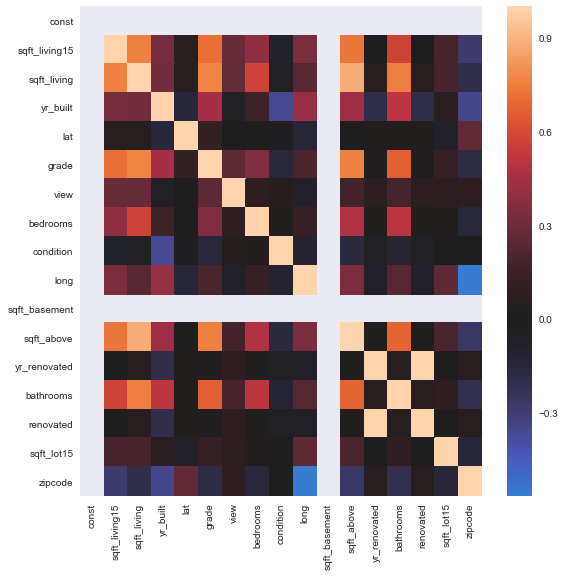

In [59]:
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

## Analysis 
Our models appears to be riddled by multicollinearity, pay special attention
Sqft_above, bathrooms, grade, and sqft_living. 

Text(0, 0.5, 'sqft_living15')

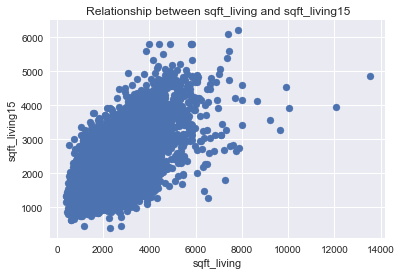

In [60]:
a = df.sqft_living
b = df.sqft_living15
plt.scatter(a, b.astype(int))
plt.title('Relationship between sqft_living and sqft_living15')
plt.xlabel('sqft_living')
plt.ylabel('sqft_living15')

In [61]:
X_int = X_int.drop('sqft_living15', axis=1)

In [62]:
model = sm.OLS(y, X_int.astype(float)).fit()
model.summary() #removing bathrooms

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3283.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:58:39   Log-Likelihood:            -2.8732e+05
No. Observations:               21082   AIC:                         5.747e+05
Df Residuals:                   21066   BIC:                         5.748e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.006e+07   2.85e+06      3.529      0.000    4.47e+06    1.56e+07
waterfront     6.028e+05   1.84e+04     32.749      0.000    5.67e+05    6.39e+05
sqft_living     152.3230      4.101     37.145      0.000     144.285     160.361
yr_built      -2622.1629     70.914    -36.977      0.000   -2761.159   -2483.167
lat            6.058e+05   1.08e+04     56.156      0.000    5.85e+05    6.27e+05
grade          1.001e+05   2086.292     47.968      0.000     9.6e+04    1.04e+05
view           5.799e+04   2117.045     27.391      0.000    5.38e+04    6.21e+04
bedrooms      -3.632e+04   1919.564    -18.921      0.000   -4.01e+04   -3.26e+04
condition        2.7e+04   2365.912     11.412      0.000    2.24e+04    3.16e+04
long          -2.054e+05    1.3e+04    -15.749      0.000   -2.31e+05    -1.8e+05
sqft_basement -5.047e-08   1.34e-08     -3.774      0.000   -7.67e-08   -2.43e-08
sqft_above       39.3764      3.932     10.014      0.000      31.669      47.083
yr_renovated   3409.5845    487.242      6.998      0.000    2454.553    4364.616
bathrooms      4.054e+04   3173.075     12.776      0.000    3.43e+04    4.68e+04
renovated     -6.759e+06   9.73e+05     -6.950      0.000   -8.67e+06   -4.85e+06
sqft_lot15       -0.2623      0.054     -4.871      0.000      -0.368      -0.157
zipcode        -606.4990     32.976    -18.392      0.000    -671.135    -541.863
==============================================================================
Omnibus:                    17530.675   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1657972.202
Skew:                           3.456   Prob(JB):                         0.00
Kurtosis:                      45.891   Cond. No.                     3.74e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

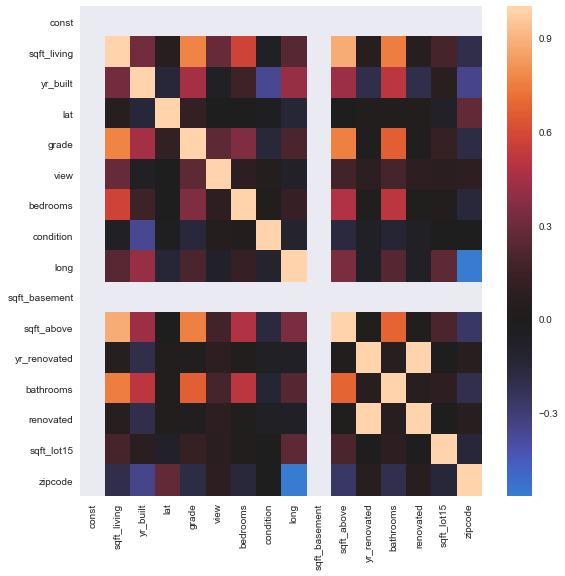

In [63]:
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

Text(0, 0.5, 'sqft_living')

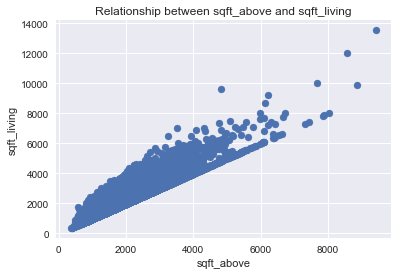

In [64]:
a = X_int.sqft_above
b = X_int.sqft_living
plt.scatter(a, b.astype(int))
plt.title('Relationship between sqft_above and sqft_living')
plt.xlabel('sqft_above')
plt.ylabel('sqft_living')

## Analysis 
Scatterplot displays very high multicollinearity between sqft_above and sqft_living. Likely best 
to drop a variable. 

In [65]:
X_int = X_int.drop('sqft_above', axis=1)


In [66]:
model = sm.OLS(y, X_int.astype(float)).fit()
model.summary() #removing bathrooms

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3494.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:58:41   Log-Likelihood:            -2.8737e+05
No. Observations:               21082   AIC:                         5.748e+05
Df Residuals:                   21067   BIC:                         5.749e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.279e+07   2.84e+06      4.498      0.000    7.22e+06    1.84e+07
waterfront     6.081e+05   1.84e+04     32.975      0.000    5.72e+05    6.44e+05
sqft_living     178.9365      3.131     57.159      0.000     172.800     185.073
yr_built      -2560.1990     70.809    -36.156      0.000   -2698.991   -2421.407
lat            5.965e+05   1.08e+04     55.372      0.000    5.75e+05    6.18e+05
grade          1.052e+05   2026.905     51.909      0.000    1.01e+05    1.09e+05
view           5.469e+04   2096.120     26.089      0.000    5.06e+04    5.88e+04
bedrooms      -3.679e+04   1923.503    -19.127      0.000   -4.06e+04    -3.3e+04
condition       2.41e+04   2353.610     10.238      0.000    1.95e+04    2.87e+04
long          -1.827e+05   1.29e+04    -14.192      0.000   -2.08e+05   -1.57e+05
sqft_basement  9.289e-08   2.02e-08      4.604      0.000    5.33e-08    1.32e-07
yr_renovated   3148.6476    487.690      6.456      0.000    2192.738    4104.557
bathrooms      3.895e+04   3176.569     12.262      0.000    3.27e+04    4.52e+04
renovated     -6.238e+06   9.73e+05     -6.408      0.000   -8.15e+06   -4.33e+06
sqft_lot15       -0.2479      0.054     -4.594      0.000      -0.354      -0.142
zipcode        -602.9315     33.052    -18.242      0.000    -667.716    -538.147
==============================================================================
Omnibus:                    17573.795   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1677826.981
Skew:                           3.467   Prob(JB):                         0.00
Kurtosis:                      46.151   Cond. No.                     1.29e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

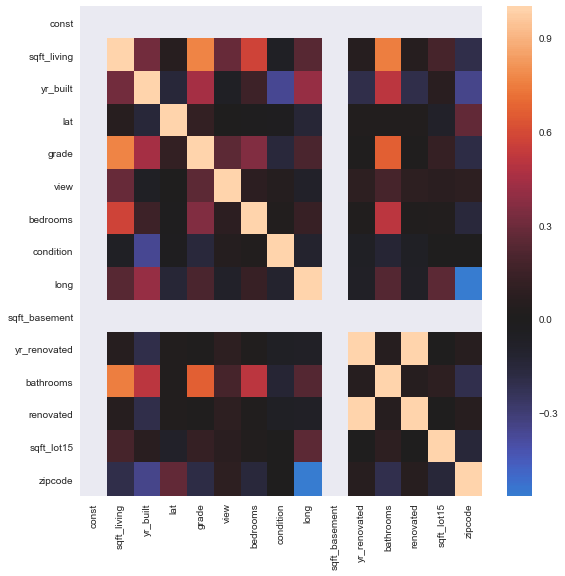

In [67]:
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

Text(0, 0.5, 'sqft_living')

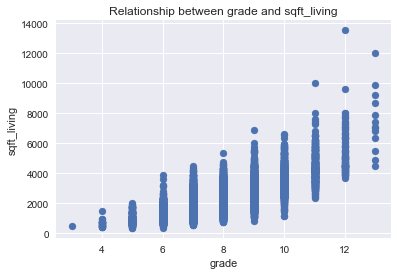

In [68]:
plt.scatter(X_int.grade, X_int.sqft_living)
plt.title('Relationship between grade and sqft_living')
plt.xlabel('grade')
plt.ylabel('sqft_living')

## Analysis 
Positive correlation between grade and sqft_living

In [69]:
X_int = X_int.drop('sqft_living', axis=1)

In [70]:
model = sm.OLS(y, X_int.astype(float)).fit()
model.summary() #removing bathrooms

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3040.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:58:42   Log-Likelihood:            -2.8889e+05
No. Observations:               21082   AIC:                         5.778e+05
Df Residuals:                   21068   BIC:                         5.779e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.674e+07   3.04e+06      8.783      0.000    2.08e+07    3.27e+07
waterfront     6.362e+05   1.98e+04     32.113      0.000    5.97e+05    6.75e+05
yr_built      -3395.8578     74.461    -45.606      0.000   -3541.807   -3249.909
lat            5.841e+05   1.16e+04     50.456      0.000    5.61e+05    6.07e+05
grade          1.696e+05   1811.333     93.618      0.000    1.66e+05    1.73e+05
view           6.971e+04   2234.973     31.189      0.000    6.53e+04    7.41e+04
bedrooms       3960.5701   1919.981      2.063      0.039     197.261    7723.879
condition       2.37e+04   2529.467      9.369      0.000    1.87e+04    2.87e+04
long          -8.672e+04   1.37e+04     -6.323      0.000   -1.14e+05   -5.98e+04
sqft_basement -1.857e-07    2.1e-08     -8.837      0.000   -2.27e-07   -1.44e-07
yr_renovated   2507.1352    523.993      4.785      0.000    1480.070    3534.201
bathrooms      1.178e+05   3075.581     38.289      0.000    1.12e+05    1.24e+05
renovated     -4.967e+06   1.05e+06     -4.749      0.000   -7.02e+06   -2.92e+06
sqft_lot15        0.1850      0.057      3.222      0.001       0.072       0.298
zipcode        -607.1894     35.522    -17.094      0.000    -676.814    -537.564
==============================================================================
Omnibus:                    20011.485   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2925636.229
Skew:                           4.171   Prob(JB):                         0.00
Kurtosis:                      60.105   Cond. No.                     2.12e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

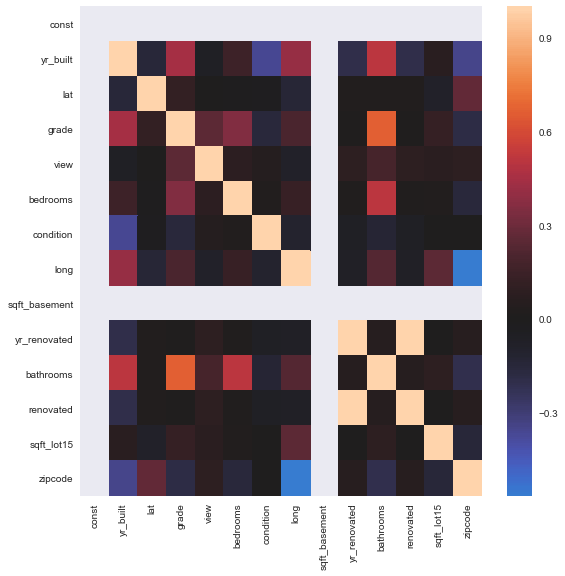

In [71]:
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

In [72]:
X_int = X_int.drop('renovated', axis=1)

Text(0, 0.5, 'bathrooms')

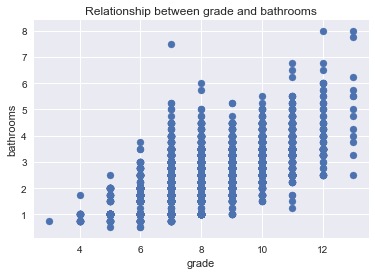

In [73]:
plt.scatter(X_int.grade, X_int.bathrooms)
plt.title('Relationship between grade and bathrooms')
plt.xlabel('grade')
plt.ylabel('bathrooms')

## Analysis 
Positive correlation between batrooms and grade, consider removing one

In [74]:
X_int = X_int.drop('bathrooms', axis=1)

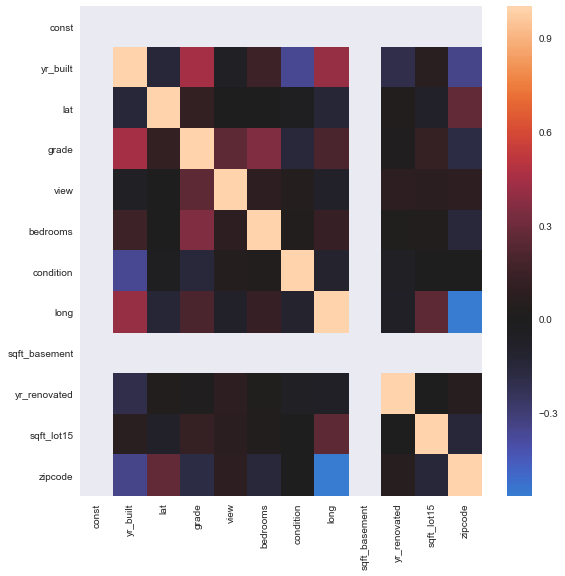

In [75]:
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

In [76]:
model = sm.OLS(y, X_int.astype(float)).fit()
model.summary() #removing bathrooms

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     3227.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:58:46   Log-Likelihood:            -2.8961e+05
No. Observations:               21082   AIC:                         5.793e+05
Df Residuals:                   21070   BIC:                         5.793e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.136e+07   3.15e+06      6.786      0.000    1.52e+07    2.75e+07
waterfront     6.382e+05   2.05e+04     31.145      0.000    5.98e+05    6.78e+05
yr_built      -2365.7035     71.875    -32.914      0.000   -2506.584   -2224.823
lat            6.024e+05    1.2e+04     50.325      0.000    5.79e+05    6.26e+05
grade          1.999e+05   1688.852    118.368      0.000    1.97e+05    2.03e+05
view           7.757e+04   2302.704     33.688      0.000    7.31e+04    8.21e+04
bedrooms       3.509e+04   1802.643     19.464      0.000    3.16e+04    3.86e+04
condition      2.933e+04   2609.652     11.238      0.000    2.42e+04    3.44e+04
long          -9.309e+04   1.42e+04     -6.559      0.000   -1.21e+05   -6.53e+04
sqft_basement -2.556e-09   8.88e-11    -28.801      0.000   -2.73e-09   -2.38e-09
yr_renovated     42.8073      4.428      9.668      0.000      34.129      51.486
sqft_lot15        0.2126      0.059      3.578      0.000       0.096       0.329
zipcode        -591.0043     36.761    -16.077      0.000    -663.058    -518.951
==============================================================================
Omnibus:                    20692.071   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3405261.894
Skew:                           4.383   Prob(JB):                         0.00
Kurtosis:                      64.642   Cond. No.                     5.43e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'zipcode')

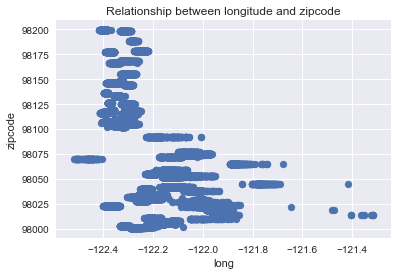

In [77]:
plt.scatter(X_int.long, X_int.zipcode)
plt.title('Relationship between longitude and zipcode')
plt.xlabel('long')
plt.ylabel('zipcode')

## Analysis 
Correlation appears to exist appears relatively small. 

In [78]:
model = sm.OLS(y, X_int.astype(float)).fit()
model.summary() #removing bathrooms

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     3227.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:58:48   Log-Likelihood:            -2.8961e+05
No. Observations:               21082   AIC:                         5.793e+05
Df Residuals:                   21070   BIC:                         5.793e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.136e+07   3.15e+06      6.786      0.000    1.52e+07    2.75e+07
waterfront     6.382e+05   2.05e+04     31.145      0.000    5.98e+05    6.78e+05
yr_built      -2365.7035     71.875    -32.914      0.000   -2506.584   -2224.823
lat            6.024e+05    1.2e+04     50.325      0.000    5.79e+05    6.26e+05
grade          1.999e+05   1688.852    118.368      0.000    1.97e+05    2.03e+05
view           7.757e+04   2302.704     33.688      0.000    7.31e+04    8.21e+04
bedrooms       3.509e+04   1802.643     19.464      0.000    3.16e+04    3.86e+04
condition      2.933e+04   2609.652     11.238      0.000    2.42e+04    3.44e+04
long          -9.309e+04   1.42e+04     -6.559      0.000   -1.21e+05   -6.53e+04
sqft_basement -2.556e-09   8.88e-11    -28.801      0.000   -2.73e-09   -2.38e-09
yr_renovated     42.8073      4.428      9.668      0.000      34.129      51.486
sqft_lot15        0.2126      0.059      3.578      0.000       0.096       0.329
zipcode        -591.0043     36.761    -16.077      0.000    -663.058    -518.951
==============================================================================
Omnibus:                    20692.071   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3405261.894
Skew:                           4.383   Prob(JB):                         0.00
Kurtosis:                      64.642   Cond. No.                     5.43e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model Interpretation: 
On average, holding all other constants equal, having a
house on the waterfront would increase the price of the house by 64460 dollars.

On average, holding all other constants equal, having an extra bedroom on your 
 house increases the price by 24770 dollars.

On average, holding all other constants equal, having an extra square foot in 
the basement increases the price by 76.85 dollars. 

In [79]:
from sklearn import preprocessing

In [80]:
X_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 13 columns):
const            21082 non-null float64
waterfront       21082 non-null category
yr_built         21082 non-null int64
lat              21082 non-null float64
grade            21082 non-null int64
view             21082 non-null float64
bedrooms         21082 non-null int64
condition        21082 non-null int64
long             21082 non-null float64
sqft_basement    21082 non-null float64
yr_renovated     21082 non-null float64
sqft_lot15       21082 non-null int64
zipcode          21082 non-null int64
dtypes: category(1), float64(6), int64(6)
memory usage: 2.1 MB


In [81]:
X_int['waterfront']=X_int['waterfront'].astype('float64')

In [82]:
model = sm.OLS(y, X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     3227.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:58:50   Log-Likelihood:            -2.8961e+05
No. Observations:               21082   AIC:                         5.793e+05
Df Residuals:                   21070   BIC:                         5.793e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.136e+07   3.15e+06      6.786      0.000    1.52e+07    2.75e+07
waterfront     6.382e+05   2.05e+04     31.145      0.000    5.98e+05    6.78e+05
yr_built      -2365.7035     71.875    -32.914      0.000   -2506.584   -2224.823
lat            6.024e+05    1.2e+04     50.325      0.000    5.79e+05    6.26e+05
grade          1.999e+05   1688.852    118.368      0.000    1.97e+05    2.03e+05
view           7.757e+04   2302.704     33.688      0.000    7.31e+04    8.21e+04
bedrooms       3.509e+04   1802.643     19.464      0.000    3.16e+04    3.86e+04
condition      2.933e+04   2609.652     11.238      0.000    2.42e+04    3.44e+04
long          -9.309e+04   1.42e+04     -6.559      0.000   -1.21e+05   -6.53e+04
sqft_basement -2.556e-09   8.88e-11    -28.801      0.000   -2.73e-09   -2.38e-09
yr_renovated     42.8073      4.428      9.668      0.000      34.129      51.486
sqft_lot15        0.2126      0.059      3.578      0.000       0.096       0.329
zipcode        -591.0043     36.761    -16.077      0.000    -663.058    -518.951
==============================================================================
Omnibus:                    20692.071   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3405261.894
Skew:                           4.383   Prob(JB):                         0.00
Kurtosis:                      64.642   Cond. No.                     5.43e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Analysis
Observing the normality and standardness of dataset. We Notice that most data is 
not normally distributed and scale varies strongly.  

In [83]:
#Just getting data again and cleaning for standardized model
df = pd.read_csv('kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [84]:
df['date']=pd.to_datetime(df['date'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [86]:
c = []
for i in range(0, len(df)):
    if df.sqft_basement[i]=="?":
        c.append(i)
len(c)
df=df[df.sqft_basement != '?']

In [87]:
len(c)

454

In [88]:
df['sqft_basement']=df['sqft_basement'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null datetime64[ns]
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [89]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [90]:
df['waterfront']=df['waterfront'].fillna(0)
#dropping because if someone has a view of the waterfront, we
#expect that to increase the value of the home so the ones left blank
#likely aren't close to the waterfront

In [91]:
df['yr_renovated']=df['yr_renovated'].fillna(0)
#similar to the reasoning about waterfront, if a home has been renovated
#it is expected to sell for a higher price all other things equal
#therefore if a home has been renovated it would be likely to be referenced. 

In [92]:
df=df.dropna()

In [93]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [94]:
df.shape

(21082, 21)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
id               21082 non-null int64
date             21082 non-null datetime64[ns]
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [96]:
wat = df.waterfront
yr_b = df.yr_built
lat = df.lat
grade = df.grade
view = df.view
bath = df.bathrooms
bedr = df.bedrooms
cond = df.condition
long = df.long
sq_base = df.sqft_basement
yr_re = df.yr_renovated
sq_lot15 = df.sqft_lot15
zipcode= df.zipcode
sq_liv = df.sqft_living
sq_lot = df.sqft_lot
date = df.date
floors = df.floors
sq_living15 = df.sqft_living15 
sqft_lot15 = df.sqft_lot15
above = df.sqft_above
data_log = pd.DataFrame([])
data_pred = df.iloc[:,:]
#data_log["loghorse"] = np.log(data_pred["horsepower"])
#data_log["logweight"] = np.log(data_pred["weight"])

(array([ 830.,  842., 1125., 1194., 2660., 2877., 2752., 2519., 2794.,
        3489.]),
 array([1900. , 1911.5, 1923. , 1934.5, 1946. , 1957.5, 1969. , 1980.5,
        1992. , 2003.5, 2015. ]),
 <a list of 10 Patch objects>)

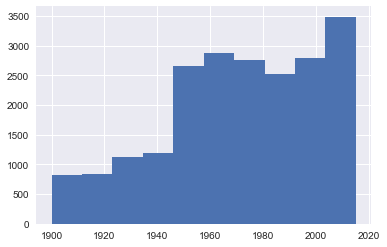

In [97]:
plt.hist(yr_b)

(array([ 830.,  842., 1104., 1215., 2464., 3073., 2519., 2752., 2794.,
        3489.]),
 array([7.54960917, 7.5554857 , 7.56136223, 7.56723876, 7.57311529,
        7.57899182, 7.58486835, 7.59074488, 7.59662141, 7.60249794,
        7.60837447]),
 <a list of 10 Patch objects>)

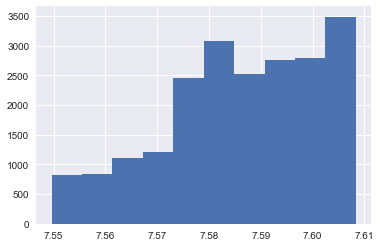

In [98]:
# not logging/normalizing wat because binary
#log yr because skewed
logyrb=np.log(df.yr_built)
plt.hist(logyrb)

(array([ 830.,  842., 1104., 1215., 2464., 3073., 2519., 2752., 2794.,
        3489.]),
 array([-0.62260844, -0.52260844, -0.42260844, -0.32260844, -0.22260844,
        -0.12260844, -0.02260844,  0.07739156,  0.17739156,  0.27739156,
         0.37739156]),
 <a list of 10 Patch objects>)

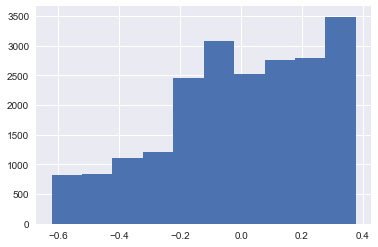

In [99]:
scaled_logyrb = (logyrb-np.mean(logyrb))/(max(logyrb)-min(logyrb))
plt.hist(scaled_logyrb)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(logyrb))

In [100]:
df.yr_built = scaled_logyrb
df.yr_built.head()

0   -0.137011
1   -0.171863
2   -0.329590
3   -0.050190
4    0.139271
Name: yr_built, dtype: float64

(array([2269., 2874., 2527., 2182., 2190., 1884., 1257., 1667., 2607.,
        1625.]),
 array([735355., 735394., 735433., 735472., 735511., 735550., 735589.,
        735628., 735667., 735706., 735745.]),
 <a list of 10 Patch objects>)

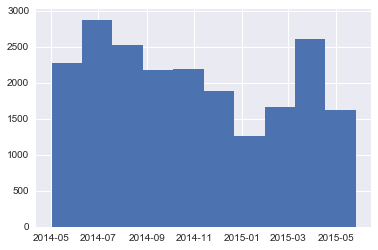

In [101]:
plt.hist(date)
#scaled_date = (date-np.mean(date))/np.sqrt(np.var(date))
#plt.hist(scaled_logdate)
#(max(logyrb)-min(logyrb))

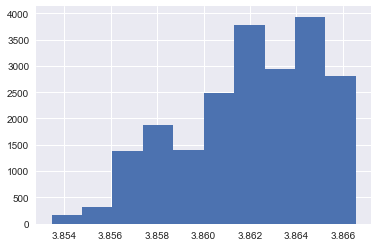

(array([ 176.,  319., 1391., 1877., 1396., 2515., 3757., 2939., 3926.,
        2786.]),
 array([-0.65058828, -0.55058828, -0.45058828, -0.35058828, -0.25058828,
        -0.15058828, -0.05058828,  0.04941172,  0.14941172,  0.24941172,
         0.34941172]),
 <a list of 10 Patch objects>)

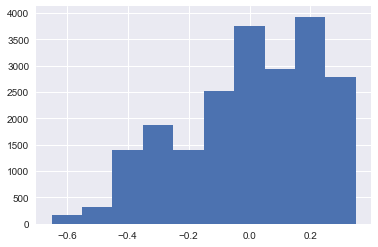

In [102]:
#plt.hist(lat)
#plt.show()
loglat=np.log(df.lat)
plt.hist(loglat)
plt.show()
scaled_lat = (lat-np.mean(lat))/(max(lat)-min(lat))
plt.hist(scaled_lat)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))

In [103]:
df.lat = scaled_lat
df.lat.head()

0   -0.079091
1    0.258371
2    0.285555
3   -0.063649
4    0.090766
Name: lat, dtype: float64

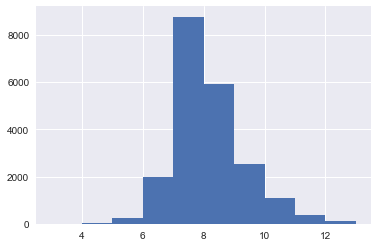

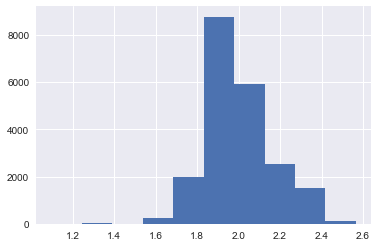

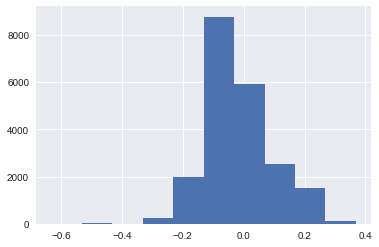

In [104]:
#grade appears to be a fairly normal dataset
plt.hist(grade)
plt.show()
loggrade=np.log(df.grade)
plt.hist(loggrade)
plt.show()
scaled_grade = (loggrade-np.mean(loggrade))/(max(loggrade)-min(loggrade))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_grade)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
names =[]
names.append(['scaled_logyrb', 'scaled_loglat'])

In [105]:
df.grade = scaled_grade
df.grade.head()

0   -0.053542
1   -0.053542
2   -0.158669
3   -0.053542
4    0.037522
Name: grade, dtype: float64

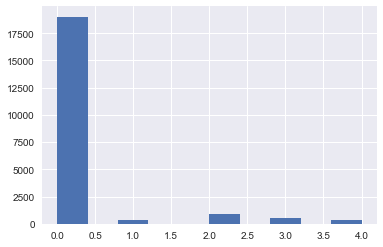

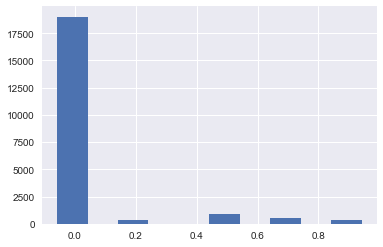

In [106]:
# cant use log here because it starts at 0
plt.hist(view)
plt.show()
#loggrade=np.log(df.view)
#plt.hist(logview)
scaled_view = (view-np.mean(view))/(max(view)-min(view))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_view)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
names.append(['scaled_grade', 'scaled_view'])

In [107]:
df.view=scaled_view
df.view.head()

0   -0.058332
1   -0.058332
2   -0.058332
3   -0.058332
4   -0.058332
Name: view, dtype: float64

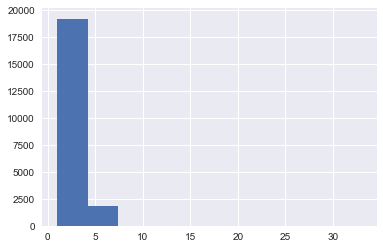

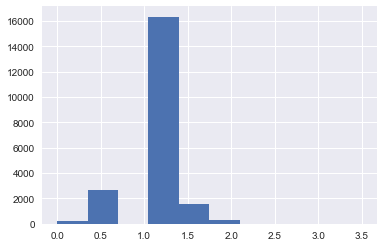

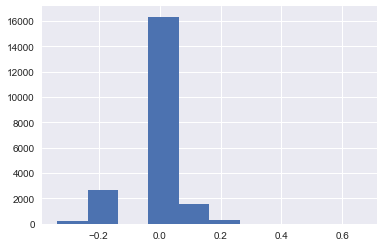

In [108]:
# bed very abnormal distribution, normalizes somewhat after 
plt.hist(bedr)
plt.show()
bedr.min()
logbed=np.log(df.bedrooms)
plt.hist(logbed)
plt.show()
scaled_bed = (logbed-np.mean(logbed))/(max(logbed)-min(logbed))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_bed)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
names.append(['scaled_bed'])

In [109]:
df.bedrooms = scaled_bed
df.bedrooms.head()

0   -0.022622
1   -0.022622
2   -0.138585
3    0.059655
4   -0.022622
Name: bedrooms, dtype: float64

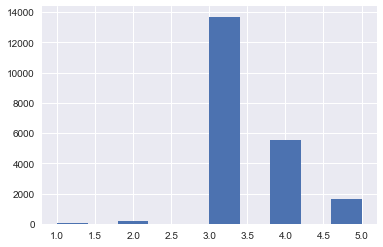

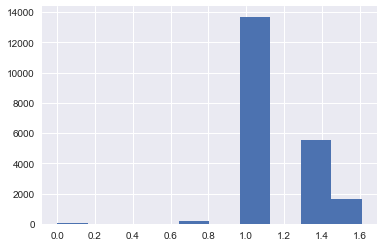

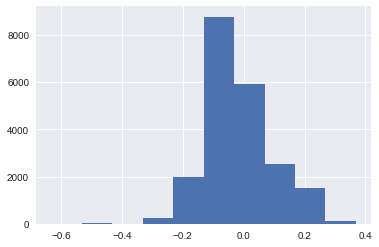

In [110]:
#grade logcond marginally less skewed
plt.hist(cond)
plt.show()
logcond=np.log(df.condition)
plt.hist(logcond)
plt.show()
scaled_cond = (logcond-np.mean(logcond))/(max(logcond)-min(logcond))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_grade)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
names.append(['scaled_cond'])

In [111]:
df.condition= scaled_cond
scaled_cond.head()

0   -0.069086
1   -0.069086
2   -0.069086
3    0.248308
4   -0.069086
Name: condition, dtype: float64

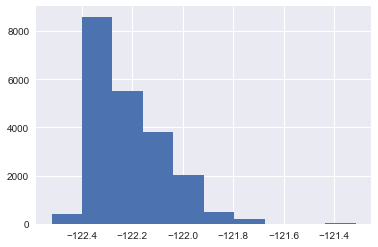

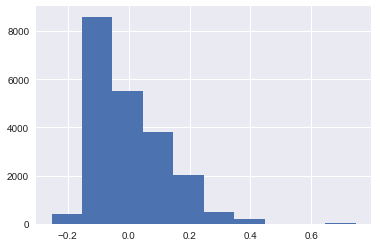

In [112]:
#grade appears more normal before taking the log
plt.hist(long)
plt.show()
#loggrade=np.log(df.grade)
#plt.hist(loggrade)
#plt.show()
scaled_long = (long-np.mean(long))/(max(long)-min(long))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_long)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
names.append(['scaled_long'])

In [113]:
df.long=scaled_long
df.long.head()

0   -0.035845
1   -0.087340
2   -0.015911
3   -0.148801
4    0.140235
Name: long, dtype: float64

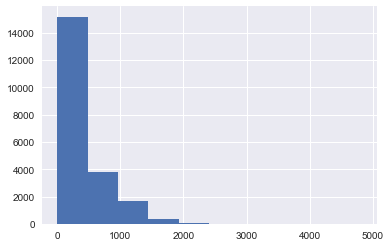

(array([1.5178e+04, 3.7860e+03, 1.6910e+03, 3.4000e+02, 6.9000e+01,
        1.2000e+01, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-0.06044813,  0.03955187,  0.13955187,  0.23955187,  0.33955187,
         0.43955187,  0.53955187,  0.63955187,  0.73955187,  0.83955187,
         0.93955187]),
 <a list of 10 Patch objects>)

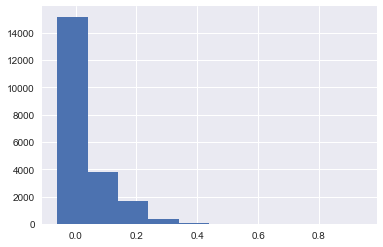

In [114]:
#many homes have zero basement space, cannot logg this 
plt.hist(sq_base)
plt.show()
#loggrade=np.log(df.grade)
#plt.hist(loggrade)
#plt.show()
scaled_sq_base = (sq_base-np.mean(sq_base))/(max(sq_base)-min(sq_base))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_sq_base)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
#names.append(['scaled_sq_base'])

In [115]:
df.sqft_basement = scaled_sq_base
df.sqft_basement.head()

0   -0.060448
1    0.022539
2   -0.060448
3    0.128349
4   -0.060448
Name: sqft_basement, dtype: float64

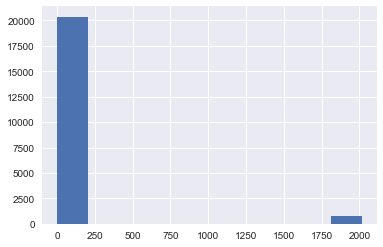

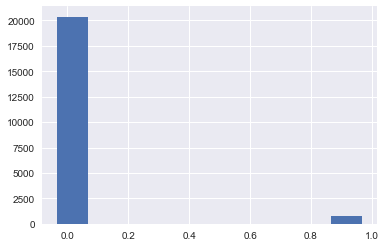

In [116]:
#many homes have have not been refurbished, cannot logg this 
plt.hist(yr_re)
plt.show()
#loggrade=np.log(df.grade)
#plt.hist(loggrade)
#plt.show()
scaled_yr_re = (yr_re-np.mean(yr_re))/(max(yr_re)-min(yr_re))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_yr_re)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
names.append(['scaled_yr_re'])

In [117]:
df.yr_renovated=scaled_yr_re
df.yr_renovated.head()

0   -0.033925
1    0.954164
2   -0.033925
3   -0.033925
4   -0.033925
Name: yr_renovated, dtype: float64

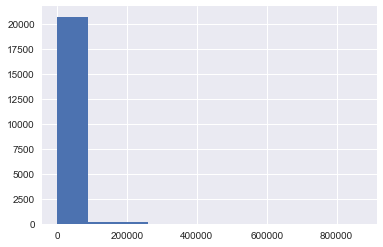

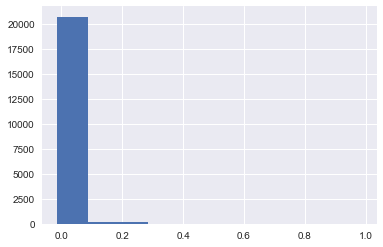

In [118]:
#many homes do not have a lot, cannot logg this 
plt.hist(sq_lot15)
plt.show()
sq_lot15.min()
#loggrade=np.log(df.grade)
#plt.hist(loggrade)
#plt.show()
scaled_sq_lot15 = (sq_lot15-np.mean(sq_lot15))/(max(sq_lot15)-min(sq_lot15))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_sq_lot15)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
names.append(['scaled_sq_lot15'])

In [119]:
df.sqft_lot15 = scaled_sq_lot15
df.sqft_lot15.head()

0   -0.008136
1   -0.005851
2   -0.005365
3   -0.008882
4   -0.006007
Name: sqft_lot15, dtype: float64

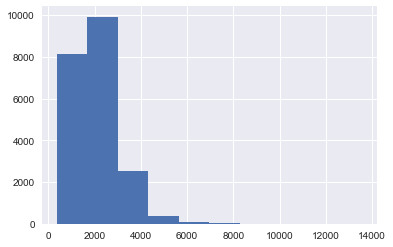

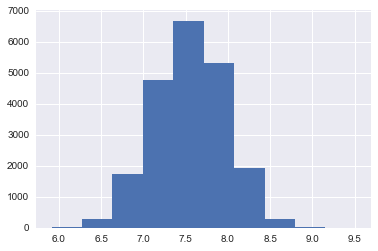

(array([2.0701e+04, 1.8700e+02, 1.6000e+02, 2.1000e+01, 1.0000e+01,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-0.01387804,  0.08612196,  0.18612196,  0.28612196,  0.38612196,
         0.48612196,  0.58612196,  0.68612196,  0.78612196,  0.88612196,
         0.98612196]),
 <a list of 10 Patch objects>)

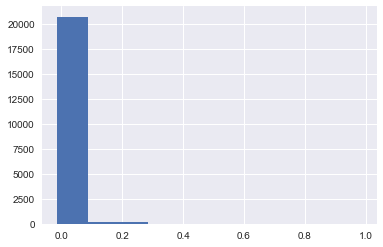

In [120]:
#the log distribution is very normal
plt.hist(sq_liv)
plt.show()
logsq_liv=np.log(df.sqft_living)
plt.hist(logsq_liv)
plt.show()
scaled_sq_liv = (sq_liv-np.mean(sq_liv))/(max(sq_liv)-min(sq_liv))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_sq_lot15)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
#names.append(['scaled_sq_lot15'])

In [121]:
df.sqft_living = scaled_sq_liv
df.sqft_living.head()

0   -0.068364
1    0.037178
2   -0.099496
3   -0.009139
4   -0.030399
Name: sqft_living, dtype: float64

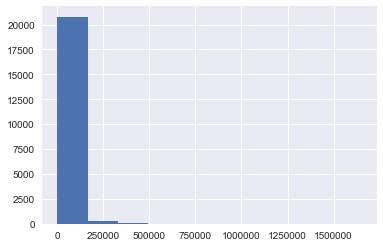

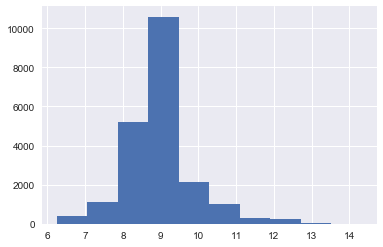

(array([3.810e+02, 1.139e+03, 5.189e+03, 1.059e+04, 2.123e+03, 1.020e+03,
        3.150e+02, 2.670e+02, 4.800e+01, 1.000e+01]),
 array([-0.33941947, -0.23941947, -0.13941947, -0.03941947,  0.06058053,
         0.16058053,  0.26058053,  0.36058053,  0.46058053,  0.56058053,
         0.66058053]),
 <a list of 10 Patch objects>)

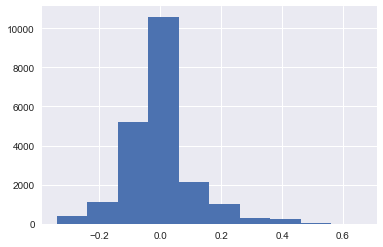

In [122]:
#many homes do not have a lot, cannot log this 
plt.hist(sq_lot)
plt.show()
logsq_lot=np.log(df.sqft_lot)
plt.hist(logsq_lot)
plt.show()
scaled_sq_lot = (logsq_lot-np.mean(logsq_lot))/(max(logsq_lot)-min(logsq_lot))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_sq_lot)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
#names.append(['scaled_sq_lot15'])


In [123]:
df.sqft_lot = scaled_sq_lot
df.sqft_lot.head()

0   -0.043562
1   -0.012775
2    0.027244
3   -0.058719
4    0.000804
Name: sqft_lot, dtype: float64

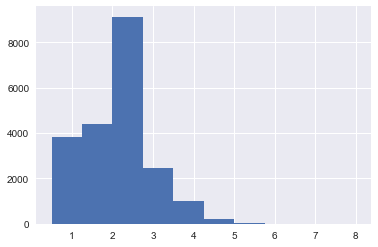

(array([3.8220e+03, 4.4050e+03, 1.0289e+04, 1.3050e+03, 1.0050e+03,
        2.1500e+02, 2.6000e+01, 9.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([-0.21545552, -0.11545552, -0.01545552,  0.08454448,  0.18454448,
         0.28454448,  0.38454448,  0.48454448,  0.58454448,  0.68454448,
         0.78454448]),
 <a list of 10 Patch objects>)

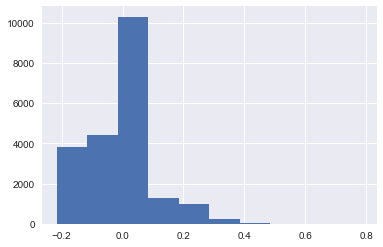

In [124]:
#bathroom is a fairly normal, if slightly right skewed sample
plt.hist(bath)
plt.show()
df.bathrooms
logbath=np.log(df.bathrooms)
#plt.hist(logbath)
#plt.show()
scaled_bath = (bath-np.mean(bath))/(max(bath)-min(bath))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_bath)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
#names.append(['scaled_sq_lot15'])


In [125]:
df.bathrooms = scaled_bath
df.bathrooms.head()

0   -0.148789
1    0.017878
2   -0.148789
3    0.117878
4   -0.015456
Name: bathrooms, dtype: float64

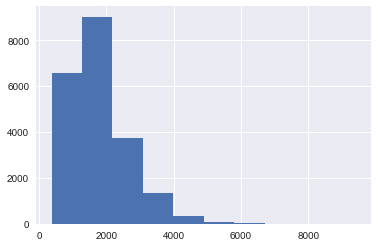

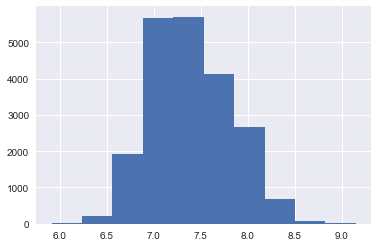

(array([  19.,  219., 1931., 5657., 5702., 4111., 2664.,  685.,   85.,
           9.]),
 array([-0.45793392, -0.35793392, -0.25793392, -0.15793392, -0.05793392,
         0.04206608,  0.14206608,  0.24206608,  0.34206608,  0.44206608,
         0.54206608]),
 <a list of 10 Patch objects>)

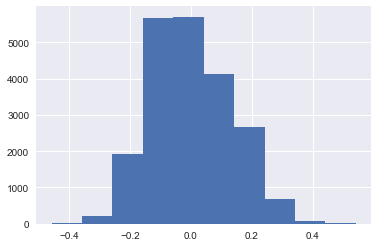

In [126]:
#log_above creates a very normal relationship
plt.hist(above)
plt.show()
log_sqft_above=np.log(df.sqft_above)
plt.hist(log_sqft_above)
plt.show()
scaled_log_sqft_above = (log_sqft_above-np.mean(log_sqft_above))/(max(log_sqft_above)-min(log_sqft_above))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_log_sqft_above)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
#names.append(['scaled_sq_lot15'])

In [127]:
df.sqft_above = scaled_log_sqft_above
df.sqft_above.head()

0   -0.099542
1    0.088718
2   -0.231456
3   -0.135612
4    0.009629
Name: sqft_above, dtype: float64

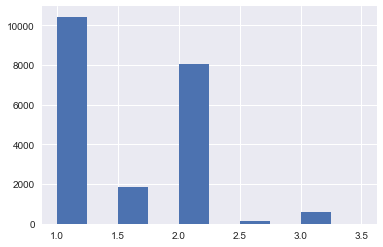

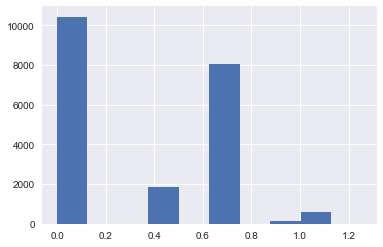

(array([1.0427e+04, 0.0000e+00, 1.8580e+03, 0.0000e+00, 8.0430e+03,
        0.0000e+00, 1.5400e+02, 0.0000e+00, 5.9300e+02, 7.0000e+00]),
 array([-0.19744806, -0.09744806,  0.00255194,  0.10255194,  0.20255194,
         0.30255194,  0.40255194,  0.50255194,  0.60255194,  0.70255194,
         0.80255194]),
 <a list of 10 Patch objects>)

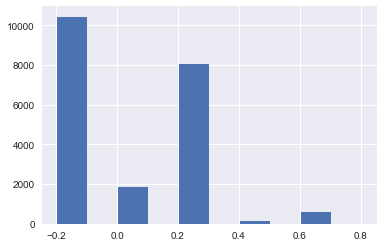

In [128]:
#many homes do not have a lot, cannot log this 
plt.hist(floors)
plt.show()
log_floors=np.log(floors)
plt.hist(log_floors)
plt.show()
scaled_floors = (floors-np.mean(floors))/(max(floors)-min(floors))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_floors)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
#names.append(['scaled_sq_lot15'])

In [129]:
df.floors=scaled_floors

In [130]:
df.floors.head()

0   -0.197448
1    0.202552
2   -0.197448
3   -0.197448
4   -0.197448
Name: floors, dtype: float64

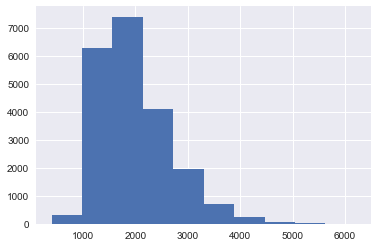

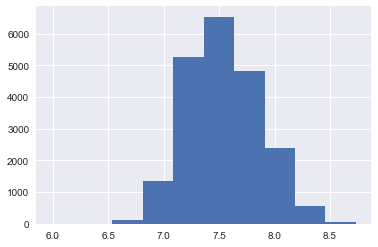

(array([3.000e+00, 5.000e+00, 1.290e+02, 1.353e+03, 5.251e+03, 6.531e+03,
        4.811e+03, 2.385e+03, 5.590e+02, 5.500e+01]),
 array([-0.56492004, -0.46492004, -0.36492004, -0.26492004, -0.16492004,
        -0.06492004,  0.03507996,  0.13507996,  0.23507996,  0.33507996,
         0.43507996]),
 <a list of 10 Patch objects>)

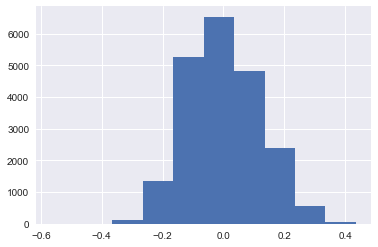

In [131]:
# sq_living15 become normalized when logged
plt.hist(sq_living15)
plt.show()
log_sq_living15=np.log(sq_living15)
plt.hist(log_sq_living15)
plt.show()
scaled_log_sqliving15 = (log_sq_living15-np.mean(log_sq_living15))/(max(log_sq_living15)-min(log_sq_living15))
#scaled_grade = (grade-np.mean(grade))/(max(grade)-min(grade))
plt.hist(scaled_log_sqliving15)
#(max(logyrb)-min(logyrb))
#np.sqrt(np.var(lat))
#names =[]
#names.append(['scaled_sq_lot15'])

In [132]:
df.sqft_living15=scaled_log_sqliving15
df.sqft_living15.head()

0   -0.123578
1   -0.039038
2    0.134336
3   -0.118181
4   -0.016066
Name: sqft_living15, dtype: float64

In [133]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0 -0.022622  -0.148789    -0.068364   
1  6414100192 2014-12-09  538000.0 -0.022622   0.017878     0.037178   
2  5631500400 2015-02-25  180000.0 -0.138585  -0.148789    -0.099496   
3  2487200875 2014-12-09  604000.0  0.059655   0.117878    -0.009139   
4  1954400510 2015-02-18  510000.0 -0.022622  -0.015456    -0.030399   

   sqft_lot    floors  waterfront      view  ...     grade  sqft_above  \
0 -0.043562 -0.197448         0.0 -0.058332  ... -0.053542   -0.099542   
1 -0.012775  0.202552         0.0 -0.058332  ... -0.053542    0.088718   
2  0.027244 -0.197448         0.0 -0.058332  ... -0.158669   -0.231456   
3 -0.058719 -0.197448         0.0 -0.058332  ... -0.053542   -0.135612   
4  0.000804 -0.197448         0.0 -0.058332  ...  0.037522    0.009629   

   sqft_basement  yr_built  yr_renovated  zipcode       lat      long  \
0      -0.060448 -0.137011     -0.033925    98178 -0.079091 -0.035845   
1       0.022539 -0.171863      0.954164    98125  0.258371 -0.087340   
2      -0.060448 -0.329590     -0.033925    98028  0.285555 -0.015911   
3       0.128349 -0.050190     -0.033925    98136 -0.063649 -0.148801   
4      -0.060448  0.139271     -0.033925    98074  0.090766  0.140235   

   sqft_living15  sqft_lot15  
0      -0.123578   -0.008136  
1      -0.039038   -0.005851  
2       0.134336   -0.005365  
3      -0.118181   -0.008882  
4      -0.016066   -0.006007  

[5 rows x 21 columns]

In [134]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.108200e+04  2.108200e+04  2.108200e+04  2.108200e+04  2.108200e+04   
mean   4.582793e+09  5.402469e+05  2.039898e-14  3.816016e-16  6.946793e-18   
std    2.876423e+09  3.667323e+05  8.084760e-02  1.024189e-01  6.969297e-02   
min    1.000102e+06  7.800000e+04 -3.368251e-01 -2.154555e-01 -1.298679e-01   
25%    2.123700e+09  3.220000e+05 -2.262238e-02 -4.878886e-02 -4.938193e-02   
50%    3.904970e+09  4.500000e+05 -2.262238e-02  1.787781e-02 -1.293546e-02   
75%    7.312200e+09  6.450000e+05  5.965460e-02  5.121114e-02  3.565983e-02   
max    9.900000e+09  7.700000e+06  6.631749e-01  7.845445e-01  8.701321e-01   

           sqft_lot        floors    waterfront          view     condition  \
count  2.108200e+04  2.108200e+04  21082.000000  2.108200e+04  2.108200e+04   
mean  -5.241334e-15  1.229911e-15      0.006688 -2.519929e-16  4.473766e-14   
std    1.117924e-01  2.157481e-01      0.081509  1.912666e-01  1.126103e-01   
min   -3.394195e-01 -1.974481e-01      0.000000 -5.833175e-02 -7.516924e-01   
25%   -5.773106e-02 -1.974481e-01      0.000000 -5.833175e-02 -6.908622e-02   
50%   -6.465293e-03  2.551940e-03      0.000000 -5.833175e-02 -6.908622e-02   
75%    3.560903e-02  2.025519e-01      0.000000 -5.833175e-02  1.096607e-01   
max    6.605805e-01  8.025519e-01      1.000000  9.416682e-01  2.483076e-01   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  2.108200e+04  2.108200e+04   2.108200e+04  2.108200e+04  2.108200e+04   
mean  -1.410927e-15  3.146211e-14   1.004728e-16  8.501422e-12 -4.760755e-16   
std    1.018836e-01  1.319547e-01   9.170288e-02  2.541004e-01  1.801636e-01   
min   -6.313754e-01 -4.579339e-01  -6.044813e-02 -6.226084e-01 -3.392524e-02   
25%   -5.354245e-02 -9.434781e-02  -6.044813e-02 -1.631435e-01 -3.392524e-02   
50%   -5.354245e-02 -1.327172e-02  -6.044813e-02  3.619031e-02 -3.392524e-02   
75%    3.752215e-02  9.436239e-02   5.573444e-02  2.246970e-01 -3.392524e-02   
max    3.686246e-01  5.420661e-01   9.395519e-01  3.773916e-01  9.660748e-01   

            zipcode           lat          long  sqft_living15    sqft_lot15  
count  21082.000000  2.108200e+04  2.108200e+04   2.108200e+04  2.108200e+04  
mean   98077.858837  7.450873e-14 -6.141936e-13   3.635297e-14  1.090633e-17  
std       53.528769  2.228858e-01  1.167830e-01   1.192810e-01  3.118582e-02  
min    98001.000000 -6.505883e-01 -2.534526e-01  -5.649200e-01 -1.387804e-02  
25%    98033.000000 -1.432294e-01 -9.481471e-02  -8.492307e-02 -8.767472e-03  
50%    98065.000000  1.902729e-02 -1.341936e-02  -8.058614e-03 -5.865855e-03  
75%    98117.000000  1.895275e-01  7.378994e-02   8.261539e-02 -3.036893e-03  
max    98199.000000  3.494117e-01  7.465474e-01   4.350800e-01  9.861220e-01

In [135]:
X = df.drop(['price', 'id'], axis=1)
X.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0 2014-10-13 -0.022622  -0.148789    -0.068364 -0.043562 -0.197448   
1 2014-12-09 -0.022622   0.017878     0.037178 -0.012775  0.202552   
2 2015-02-25 -0.138585  -0.148789    -0.099496  0.027244 -0.197448   
3 2014-12-09  0.059655   0.117878    -0.009139 -0.058719 -0.197448   
4 2015-02-18 -0.022622  -0.015456    -0.030399  0.000804 -0.197448   

   waterfront      view  condition     grade  sqft_above  sqft_basement  \
0         0.0 -0.058332  -0.069086 -0.053542   -0.099542      -0.060448   
1         0.0 -0.058332  -0.069086 -0.053542    0.088718       0.022539   
2         0.0 -0.058332  -0.069086 -0.158669   -0.231456      -0.060448   
3         0.0 -0.058332   0.248308 -0.053542   -0.135612       0.128349   
4         0.0 -0.058332  -0.069086  0.037522    0.009629      -0.060448   

   yr_built  yr_renovated  zipcode       lat      long  sqft_living15  \
0 -0.137011     -0.033925    98178 -0.079091 -0.035845      -0.123578   
1 -0.171863      0.954164    98125  0.258371 -0.087340      -0.039038   
2 -0.329590     -0.033925    98028  0.285555 -0.015911       0.134336   
3 -0.050190     -0.033925    98136 -0.063649 -0.148801      -0.118181   
4  0.139271     -0.033925    98074  0.090766  0.140235      -0.016066   

   sqft_lot15  
0   -0.008136  
1   -0.005851  
2   -0.005365  
3   -0.008882  
4   -0.006007

Text(0, 0.5, 'density')

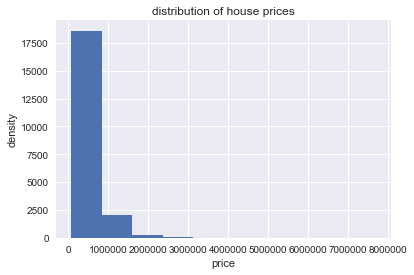

In [136]:
plt.hist(df.price)
plt.title('distribution of house prices')
plt.xlabel('price')
plt.ylabel('density')

## Analysis 
We can observe here that the distribution of prices becomes much more 
normalized after log standardization. 

In [137]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
date             21082 non-null datetime64[ns]
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null float64
waterfront       21082 non-null float64
view             21082 non-null float64
condition        21082 non-null float64
grade            21082 non-null float64
sqft_above       21082 non-null float64
sqft_basement    21082 non-null float64
yr_built         21082 non-null float64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
dtypes: datetime64[ns](1), float64(17), int64(1)
memory usage: 3.2 MB


In [195]:
X_int.head()

const  bedrooms  sqft_living    floors  waterfront      view  condition  \
0    1.0 -0.022622    -0.068364 -0.197448         0.0 -0.058332  -0.069086   
1    1.0 -0.022622     0.037178  0.202552         0.0 -0.058332  -0.069086   
2    1.0 -0.138585    -0.099496 -0.197448         0.0 -0.058332  -0.069086   
3    1.0  0.059655    -0.009139 -0.197448         0.0 -0.058332   0.248308   
4    1.0 -0.022622    -0.030399 -0.197448         0.0 -0.058332  -0.069086   

   sqft_basement  yr_built  yr_renovated  zipcode       lat      long  \
0      -0.060448 -0.137011     -0.033925    98178 -0.079091 -0.035845   
1       0.022539 -0.171863      0.954164    98125  0.258371 -0.087340   
2      -0.060448 -0.329590     -0.033925    98028  0.285555 -0.015911   
3       0.128349 -0.050190     -0.033925    98136 -0.063649 -0.148801   
4      -0.060448  0.139271     -0.033925    98074  0.090766  0.140235   

   sqft_lot15    yr  mo   d  d_o_y  
0   -0.008136  2014  10  13    317  
1   -0.005851  2014  12   9    374  
2   -0.005365  2015   2  25     84  
3   -0.008882  2014  12   9    374  
4   -0.006007  2015   2  18     77

In [139]:
X_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 13 columns):
const            21082 non-null float64
waterfront       21082 non-null float64
yr_built         21082 non-null int64
lat              21082 non-null float64
grade            21082 non-null int64
view             21082 non-null float64
bedrooms         21082 non-null int64
condition        21082 non-null int64
long             21082 non-null float64
sqft_basement    21082 non-null float64
yr_renovated     21082 non-null float64
sqft_lot15       21082 non-null int64
zipcode          21082 non-null int64
dtypes: float64(7), int64(6)
memory usage: 2.3 MB


In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     3227.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:59:08   Log-Likelihood:            -2.8961e+05
No. Observations:               21082   AIC:                         5.793e+05
Df Residuals:                   21070   BIC:                         5.793e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.136e+07   3.15e+06      6.786      0.000    1.52e+07    2.75e+07
waterfront     6.382e+05   2.05e+04     31.145      0.000    5.98e+05    6.78e+05
yr_built      -2365.7035     71.875    -32.914      0.000   -2506.584   -2224.823
lat            6.024e+05    1.2e+04     50.325      0.000    5.79e+05    6.26e+05
grade          1.999e+05   1688.852    118.368      0.000    1.97e+05    2.03e+05
view           7.757e+04   2302.704     33.688      0.000    7.31e+04    8.21e+04
bedrooms       3.509e+04   1802.643     19.464      0.000    3.16e+04    3.86e+04
condition      2.933e+04   2609.652     11.238      0.000    2.42e+04    3.44e+04
long          -9.309e+04   1.42e+04     -6.559      0.000   -1.21e+05   -6.53e+04
sqft_basement -2.556e-09   8.88e-11    -28.801      0.000   -2.73e-09   -2.38e-09
yr_renovated     42.8073      4.428      9.668      0.000      34.129      51.486
sqft_lot15        0.2126      0.059      3.578      0.000       0.096       0.329
zipcode        -591.0043     36.761    -16.077      0.000    -663.058    -518.951
==============================================================================
Omnibus:                    20692.071   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3405261.894
Skew:                           4.383   Prob(JB):                         0.00
Kurtosis:                      64.642   Cond. No.                     5.43e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [142]:
X = X.drop('date', axis=1)
year = []
month = []
day = []
for i in df.date:
    year.append((str(i)[0:4]))
    month.append(str(i)[5:7])
    day.append(str(i)[8:10])
    #print(day)

In [143]:
X['yr'] = year
X['mo']=month
X['d'] = day
X[['yr', 'mo', 'd']]=X[['yr', 'mo', 'd']].astype('int')

In [144]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null float64
waterfront       21082 non-null float64
view             21082 non-null float64
condition        21082 non-null float64
grade            21082 non-null float64
sqft_above       21082 non-null float64
sqft_basement    21082 non-null float64
yr_built         21082 non-null float64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
yr               21082 non-null int32
mo               21082 non-null int32
d                21082 non-null int32
dtypes: float64(17), int32(3), int64(1)
memory usage: 3.3 M

In [145]:
days_in_months = [31, 28, 31, 30, 31, 30, 31,31,30,31,30,31]
len(days_in_months)

12

In [147]:
d_o_y= []
for i in df.index:
    mo = X['mo'][i]
    dy_mo = (sum(days_in_months[:mo]))
    dy_mo+=X['d'][i]
    d_o_y.append(dy_mo)

In [148]:
X['d_o_y']=d_o_y
X.d_o_y=X.d_o_y.astype('int')

In [149]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  sqft_above                     with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_basement                  with p-value 9.43441e-210
Add  view                           with p-value 1.31793e-178
Add  bathrooms                      with p-value 1.09767e-60
Add  zipcode                        with p-value 6.08248e-55
Add  long                           with p-value 1.02432e-55
Add  sqft_lot                       with p-value 8.69583e-31
Add  bedrooms                       with p-value 4.55519e-30
Add  condition                      with p-value 4.57125e-30
Add  yr                             with p-value 3.69704e-23
Add  yr_renovated                   with p-value 5.41468e-14
Add  floors      

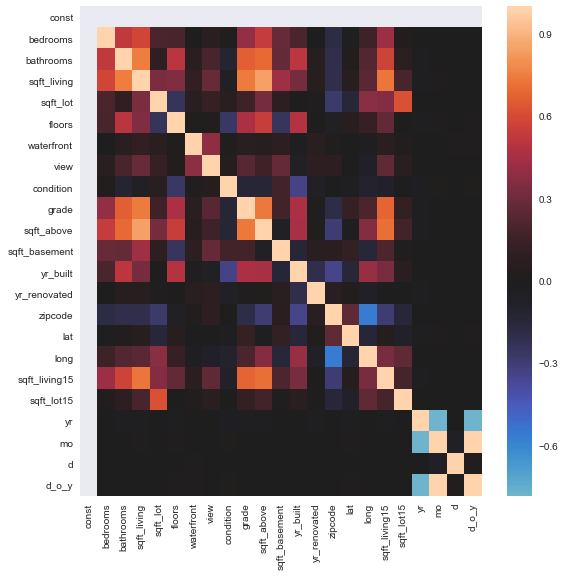

In [150]:
#X=df[['lat', 'view', 'bedrooms', 'bathrooms', 'grade', 'sqft_living', 'yr_built', 'sqft_living15', 'condition', 'waterfront', 'floors', 'zipcode', 'sqft_lot', 'sqft_lot15', 'yr_renovated', 'long', 'sqft_above', 'sqft_basement']]
X_int = sm.add_constant(X)
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

## Analysis 
We can observe really high multicollinearities, especially with sqft_above, 
sqft_living15 and bathrooms, as well as grade. 
Lets start dropping highly multicollinear variables and see how things change. 

Text(0.5, 0, 'Square Feet of Living Room')

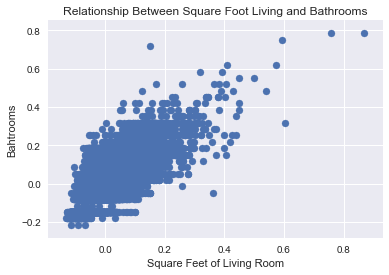

In [151]:
plt.scatter(df.sqft_living, df.bathrooms)
plt.title('Relationship Between Square Foot Living and Bathrooms')
plt.ylabel('Bahtrooms')
plt.xlabel('Square Feet of Living Room')

Text(0.5, 0, 'Square Feet of Living Room')

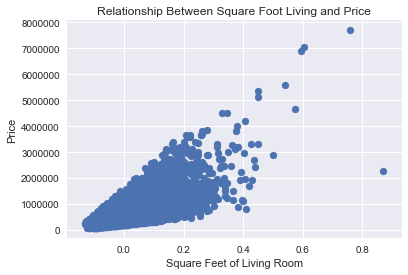

In [152]:
plt.scatter(df.sqft_living, df.price)
plt.title('Relationship Between Square Foot Living and Price')
plt.ylabel('Price')
plt.xlabel('Square Feet of Living Room')

## Analysis 
Bathrooms and stft_living room has a strong positive correlation
may be worth dropping a variable. 

In [153]:
X_int=X_int.drop('bathrooms', axis=1)

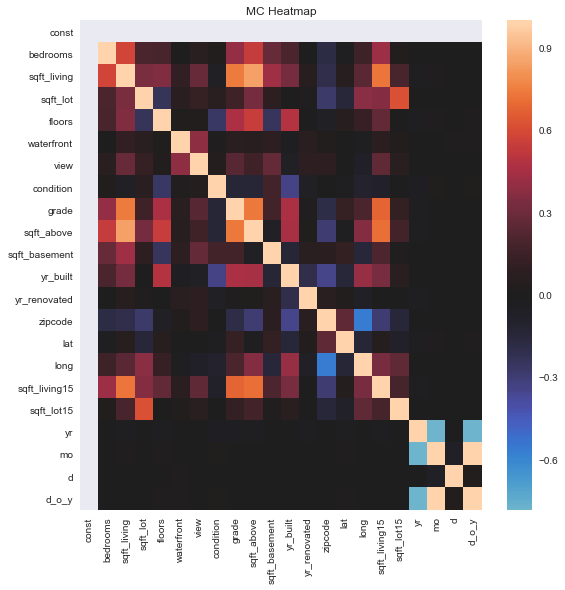

In [154]:
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
plt.title('MC Heatmap')
sns.heatmap(X_int.corr(), center=0)

## Analysis 
Even with bathrooms dropped, there appears to be a high degree of 
multicollinearity

Text(0.5, 0, 'sqft_above')

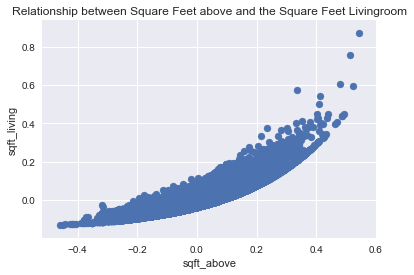

In [155]:
plt.scatter(df.sqft_above, df.sqft_living)
plt.title('Relationship between Square Feet above and the Square Feet Livingroom')
plt.ylabel('sqft_living')
plt.xlabel('sqft_above')

## Analysis 
Positive correlation between sqft_living and above,
try dropping each variable. 

In [156]:
X_int=X_int.drop('sqft_above', axis=1)
X_int.columns

Index(['const', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr', 'mo', 'd', 'd_o_y'],
      dtype='object')

In [157]:
import statsmodels.api as sm
X_int = sm.add_constant(X_int)
model = sm.OLS(y,X_int.astype(float)).fit()

In [158]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2376.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:59:18   Log-Likelihood:            -2.8758e+05
No. Observations:               21082   AIC:                         5.752e+05
Df Residuals:                   21061   BIC:                         5.754e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.729e+06   1.03e+07     -0.167      0.867    -2.2e+07    1.85e+07
bedrooms      -4.611e+05   2.18e+04    -21.147      0.000   -5.04e+05   -4.18e+05
sqft_living    3.183e+06   4.55e+04     69.965      0.000    3.09e+06    3.27e+06
sqft_lot      -2.557e+05    2.1e+04    -12.161      0.000   -2.97e+05   -2.14e+05
floors        -1.211e+04   9912.906     -1.221      0.222   -3.15e+04    7321.457
waterfront     6.072e+05   1.87e+04     32.534      0.000    5.71e+05    6.44e+05
view           2.433e+05   8653.556     28.114      0.000    2.26e+05     2.6e+05
condition      1.591e+05   1.37e+04     11.582      0.000    1.32e+05    1.86e+05
grade          9.597e+05   2.43e+04     39.422      0.000    9.12e+05    1.01e+06
sqft_basement -2.481e+05   2.16e+04    -11.485      0.000    -2.9e+05   -2.06e+05
yr_built      -2.771e+05   8085.149    -34.273      0.000   -2.93e+05   -2.61e+05
yr_renovated   5.716e+04   8143.465      7.019      0.000    4.12e+04    7.31e+04
zipcode        -663.7289     33.814    -19.629      0.000    -730.007    -597.451
lat            3.749e+05   6868.477     54.584      0.000    3.61e+05    3.88e+05
long          -2.248e+05   1.65e+04    -13.664      0.000   -2.57e+05   -1.93e+05
sqft_living15  4.472e+04   1.93e+04      2.318      0.020    6897.314    8.25e+04
sqft_lot15     1.876e+05      6e+04      3.128      0.002    7.01e+04    3.05e+05
yr             3.344e+04   4839.239      6.909      0.000     2.4e+04    4.29e+04
mo             2.656e+05   7.87e+04      3.376      0.001    1.11e+05     4.2e+05
d              8320.9581   2584.560      3.219      0.001    3255.022    1.34e+04
d_o_y         -8679.5050   2577.204     -3.368      0.001   -1.37e+04   -3627.988
==============================================================================
Omnibus:                    17232.560   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1489839.828
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                      43.622   Cond. No.                     7.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

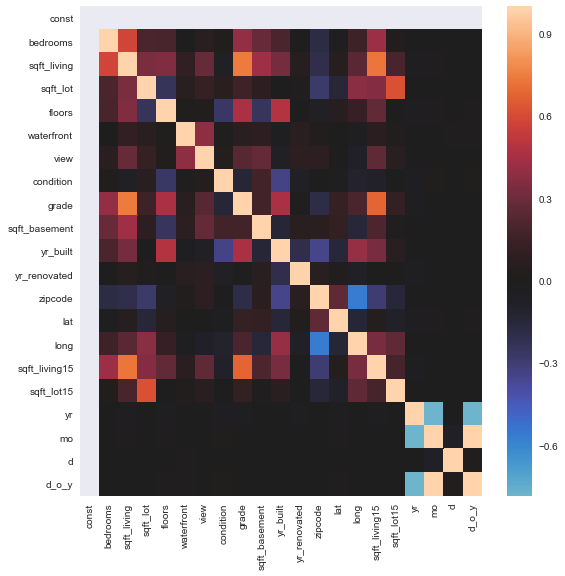

In [159]:
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

## Analysis 
MC Now appears to cluster around sqft_living15, sqft_living, and grade

Text(0.5, 0, 'grade')

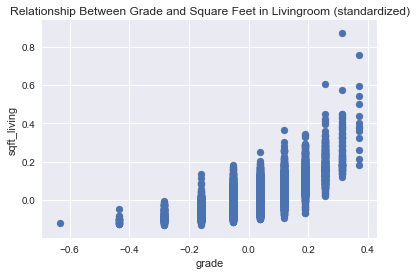

In [160]:
plt.scatter(X_int.grade, X_int.sqft_living)
plt.title('Relationship Between Grade and Square Feet in Livingroom (standardized)')
plt.ylabel('sqft_living')
plt.xlabel('grade')

In [161]:
X_int=X_int.drop('grade', axis=1)
X_int.columns

Index(['const', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr', 'mo',
       'd', 'd_o_y'],
      dtype='object')

In [162]:
import statsmodels.api as sm
X_int = sm.add_constant(X_int)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     2253.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:59:19   Log-Likelihood:            -2.8833e+05
No. Observations:               21082   AIC:                         5.767e+05
Df Residuals:                   21062   BIC:                         5.769e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.029e+07   1.07e+07      0.962      0.336   -1.07e+07    3.12e+07
bedrooms       -5.06e+05   2.26e+04    -22.423      0.000    -5.5e+05   -4.62e+05
sqft_living    3.929e+06   4.29e+04     91.631      0.000    3.84e+06    4.01e+06
sqft_lot      -2.918e+05   2.18e+04    -13.404      0.000   -3.34e+05   -2.49e+05
floors         2.278e+04   1.02e+04      2.227      0.026    2731.296    4.28e+04
waterfront     5.914e+05   1.93e+04     30.588      0.000    5.53e+05    6.29e+05
view           2.717e+05   8935.852     30.403      0.000    2.54e+05    2.89e+05
condition      1.835e+05   1.42e+04     12.903      0.000    1.56e+05    2.11e+05
sqft_basement -3.538e+05   2.22e+04    -15.931      0.000   -3.97e+05    -3.1e+05
yr_built      -1.867e+05   8033.604    -23.235      0.000   -2.02e+05   -1.71e+05
yr_renovated   7.521e+04   8425.032      8.927      0.000    5.87e+04    9.17e+04
zipcode        -713.0999     35.014    -20.366      0.000    -781.731    -644.469
lat            4.197e+05   7019.036     59.798      0.000    4.06e+05    4.33e+05
long          -3.201e+05   1.69e+04    -18.979      0.000   -3.53e+05   -2.87e+05
sqft_living15  2.549e+05   1.92e+04     13.264      0.000    2.17e+05    2.93e+05
sqft_lot15     2.213e+05   6.21e+04      3.561      0.000    9.95e+04    3.43e+05
yr             2.988e+04   5013.616      5.959      0.000       2e+04    3.97e+04
mo             2.845e+05   8.15e+04      3.490      0.000    1.25e+05    4.44e+05
d              8872.3220   2678.119      3.313      0.001    3623.003    1.41e+04
d_o_y         -9313.8572   2670.484     -3.488      0.000   -1.45e+04   -4079.504
==============================================================================
Omnibus:                    15365.673   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           927364.171
Skew:                           2.922   Prob(JB):                         0.00
Kurtosis:                      34.962   Cond. No.                     7.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

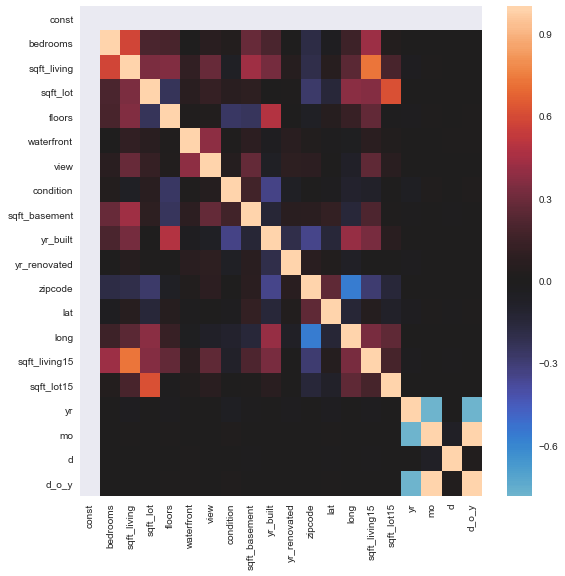

In [163]:
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

## Analysis 
sqft_living and sqft_living15 appear to be multicollinear, lets examine
relationship

Text(0.5, 0, 'sqft_living')

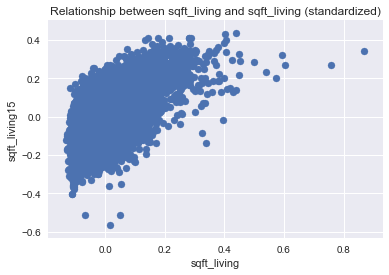

In [164]:
plt.scatter(X_int.sqft_living, X_int.sqft_living15)
plt.title('Relationship between sqft_living and sqft_living (standardized)')
plt.ylabel('sqft_living15')
plt.xlabel('sqft_living')

In [165]:
#Fairly High correlation, as sqft_living increases, as does sqft_living15

In [166]:
#Mention Consideration about dropping the cell

In [167]:
X_int=X_int.drop('sqft_living15', axis=1)
X_int.columns

Index(['const', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'yr', 'mo', 'd', 'd_o_y'],
      dtype='object')

In [168]:

import statsmodels.api as sm
X_int = sm.add_constant(X_int)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2349.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:59:21   Log-Likelihood:            -2.8842e+05
No. Observations:               21082   AIC:                         5.769e+05
Df Residuals:                   21063   BIC:                         5.770e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.685e+07   1.07e+07      1.570      0.116   -4.18e+06    3.79e+07
bedrooms      -5.019e+05   2.27e+04    -22.152      0.000   -5.46e+05   -4.57e+05
sqft_living    4.209e+06   3.75e+04    112.336      0.000    4.14e+06    4.28e+06
sqft_lot      -2.553e+05   2.17e+04    -11.776      0.000   -2.98e+05   -2.13e+05
floors         2.168e+04   1.03e+04      2.110      0.035    1544.994    4.18e+04
waterfront      5.81e+05   1.94e+04     29.950      0.000    5.43e+05    6.19e+05
view           2.918e+05   8842.510     33.000      0.000    2.74e+05    3.09e+05
condition      1.786e+05   1.43e+04     12.512      0.000    1.51e+05    2.07e+05
sqft_basement  -3.87e+05   2.22e+04    -17.464      0.000    -4.3e+05   -3.44e+05
yr_built      -1.783e+05   8041.805    -22.167      0.000   -1.94e+05   -1.63e+05
yr_renovated   7.214e+04   8456.749      8.530      0.000    5.56e+04    8.87e+04
zipcode        -764.8859     34.940    -21.891      0.000    -833.371    -696.400
lat            4.307e+05   6999.079     61.535      0.000    4.17e+05    4.44e+05
long          -3.024e+05   1.69e+04    -17.916      0.000   -3.36e+05   -2.69e+05
sqft_lot15     1.626e+05   6.22e+04      2.612      0.009    4.06e+04    2.85e+05
yr             2.914e+04   5034.084      5.789      0.000    1.93e+04     3.9e+04
mo             3.037e+05   8.19e+04      3.711      0.000    1.43e+05    4.64e+05
d              9485.2389   2688.816      3.528      0.000    4214.953    1.48e+04
d_o_y         -9947.9540   2681.120     -3.710      0.000   -1.52e+04   -4692.754
==============================================================================
Omnibus:                    14652.567   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           774536.791
Skew:                           2.753   Prob(JB):                         0.00
Kurtosis:                      32.179   Cond. No.                     7.22e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

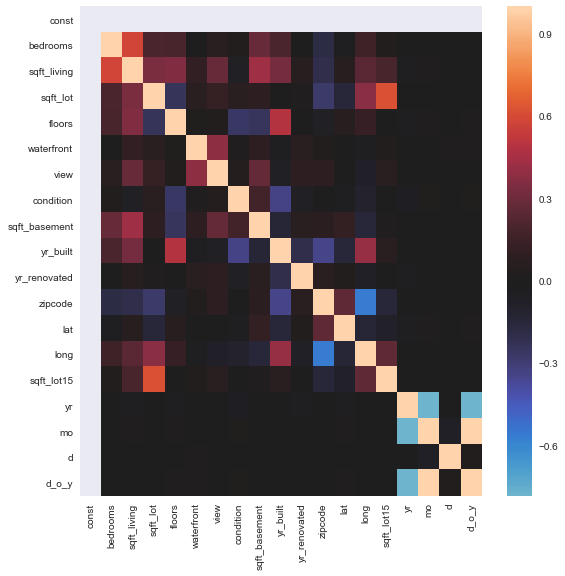

In [169]:
import seaborn as sns
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

In [170]:
#Now all that remains is bedrooms and sqft_living and sqft_lot and sqft_lot15.
#Let's examine the relationships

Text(0.5, 0, 'sqft_lot')

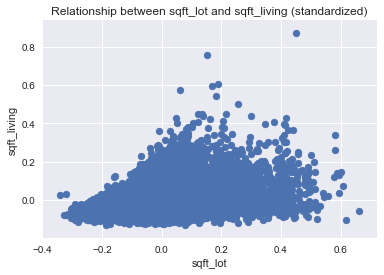

In [171]:
plt.scatter(X_int.sqft_lot, X_int.sqft_living)
plt.title('Relationship between sqft_lot and sqft_living (standardized)')
plt.ylabel('sqft_living')
plt.xlabel('sqft_lot')

## Analysis: 
They appear to covary, but the covariance between the two variables appears
to decrease as the values increase. Nonetheless, let us try to drop a variable


In [172]:
X_int=X_int.drop('sqft_lot', axis=1)
X_int.columns
import statsmodels.api as sm
X_int = sm.add_constant(X_int)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2463.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:59:22   Log-Likelihood:            -2.8849e+05
No. Observations:               21082   AIC:                         5.770e+05
Df Residuals:                   21064   BIC:                         5.772e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.216e+07   1.08e+07      1.131      0.258   -8.92e+06    3.32e+07
bedrooms      -5.174e+05   2.27e+04    -22.802      0.000   -5.62e+05   -4.73e+05
sqft_living    4.026e+06   3.42e+04    117.705      0.000    3.96e+06    4.09e+06
floors         7.738e+04   9149.103      8.458      0.000    5.94e+04    9.53e+04
waterfront     5.701e+05   1.94e+04     29.330      0.000    5.32e+05    6.08e+05
view           2.879e+05   8865.082     32.474      0.000    2.71e+05    3.05e+05
condition      1.784e+05   1.43e+04     12.460      0.000     1.5e+05    2.06e+05
sqft_basement -3.207e+05   2.15e+04    -14.916      0.000   -3.63e+05   -2.79e+05
yr_built      -1.661e+05   8000.822    -20.756      0.000   -1.82e+05    -1.5e+05
yr_renovated    7.26e+04   8484.249      8.557      0.000     5.6e+04    8.92e+04
zipcode        -739.2544     34.986    -21.130      0.000    -807.830    -670.679
lat            4.389e+05   6986.598     62.827      0.000    4.25e+05    4.53e+05
long          -3.445e+05   1.66e+04    -20.808      0.000   -3.77e+05   -3.12e+05
sqft_lot15    -2.817e+05   4.97e+04     -5.671      0.000   -3.79e+05   -1.84e+05
yr             3.022e+04   5049.675      5.984      0.000    2.03e+04    4.01e+04
mo             3.133e+05   8.21e+04      3.816      0.000    1.52e+05    4.74e+05
d              9800.1186   2697.456      3.633      0.000    4512.899    1.51e+04
d_o_y         -1.026e+04   2689.737     -3.814      0.000   -1.55e+04   -4986.646
==============================================================================
Omnibus:                    14749.332   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           801619.908
Skew:                           2.772   Prob(JB):                         0.00
Kurtosis:                      32.696   Cond. No.                     7.22e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

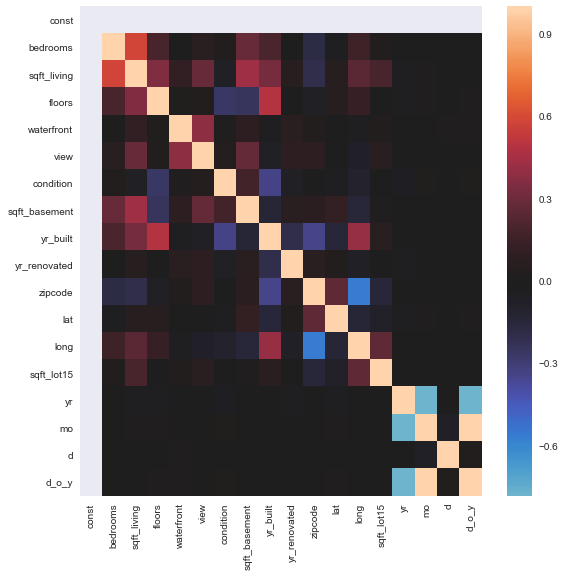

In [173]:
fig = plt.figure(figsize=(9, 9))
sns.heatmap(X_int.corr(), center=0)

In [174]:
#Just sqft_living now, by the looks of it

Text(0.5, 0, 'sqft_living')

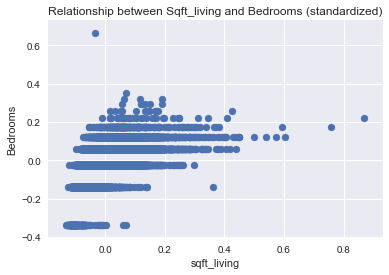

In [175]:
plt.scatter(df.sqft_living, df.bedrooms)
plt.title('Relationship between Sqft_living and Bedrooms (standardized)')
plt.ylabel('Bedrooms')
plt.xlabel('sqft_living')

## Analysis
Fair amount of correlation between the Bedrooms and sqft_living, lets drop one 
variable. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D2C44EEF0>]],
      dtype=object)

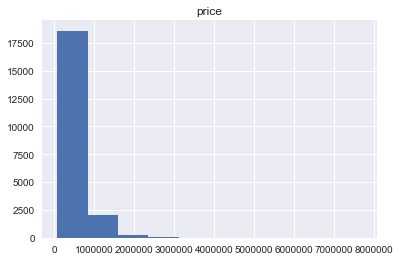

In [176]:
y.hist()

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X_int,y, test_size = .2)

In [179]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16865 4217 16865 4217


In [180]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [182]:
train_residuals = y_hat_train-y_train
test_residuals = y_hat_test - y_test

In [183]:
import statsmodels.api as sm
X_int = sm.add_constant(X_int)
model = sm.OLS(y_test,X_test.astype(float)).fit()
model.summary()

E:\Conda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     484.3
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        01:59:25   Log-Likelihood:                -57897.
No. Observations:                4217   AIC:                         1.158e+05
Df Residuals:                    4199   BIC:                         1.159e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.673e+07   2.53e+07      1.849      0.064   -2.81e+06    9.63e+07
bedrooms      -5.261e+05   5.37e+04     -9.800      0.000   -6.31e+05   -4.21e+05
sqft_living    4.235e+06   7.96e+04     53.179      0.000    4.08e+06    4.39e+06
floors          3.56e+04   2.13e+04      1.669      0.095   -6230.017    7.74e+04
waterfront     6.452e+05   4.46e+04     14.469      0.000    5.58e+05    7.33e+05
view            2.99e+05   2.17e+04     13.794      0.000    2.57e+05    3.42e+05
condition       1.24e+05    3.3e+04      3.751      0.000    5.92e+04    1.89e+05
sqft_basement -3.863e+05   5.04e+04     -7.671      0.000   -4.85e+05   -2.88e+05
yr_built      -1.894e+05   1.85e+04    -10.221      0.000   -2.26e+05   -1.53e+05
yr_renovated   6.135e+04   2.03e+04      3.029      0.002    2.16e+04    1.01e+05
zipcode        -907.1844     80.539    -11.264      0.000   -1065.084    -749.285
lat             4.45e+05   1.63e+04     27.251      0.000    4.13e+05    4.77e+05
long          -3.714e+05   3.79e+04     -9.804      0.000   -4.46e+05   -2.97e+05
sqft_lot15    -3.961e+05   1.16e+05     -3.429      0.001   -6.23e+05    -1.7e+05
yr             2.124e+04   1.19e+04      1.786      0.074   -2073.941    4.46e+04
mo             2.231e+05   1.96e+05      1.138      0.255   -1.61e+05    6.08e+05
d              6710.9403   6439.555      1.042      0.297   -5913.995    1.93e+04
d_o_y         -7341.4333   6423.405     -1.143      0.253   -1.99e+04    5251.840
==============================================================================
Omnibus:                     2844.911   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107727.111
Skew:                           2.702   Prob(JB):                         0.00
Kurtosis:                      27.164   Cond. No.                     7.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

49781853907.66211

## Baseline Regression Analysis: 
After completing a regression we can observe that
variables like year built, zipcode, longitude and square foot basement
correlate negatively with houseing prices. Much of these are unexpected
as a house with a larger basement would seem to offer an extra feature to the
homeowner. This may indicate that multicollineartity may still be affecting 
our variables. Our regression is able to predict 70 percent of the variation in 
housing prices. This indicates that we could be missing a few variables here 
would help better predict the housing prices more accurately. 
Another thing we can observe from our model is that relationship between 
latitude, view, sqft_living, and many more variables are positive when it comes
to our model.  

This is a decent start, but we can improve how we deal with features like the location and try out more complex models to see which one performs. best. 

In [185]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error
def metric_report(y_pred, y_score):
    print("TRAIN SET:")
    print("Exp'd Variance:", explained_variance_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_train, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred)))
    print("Max Error:", max_error(y_train, y_pred))
    print()
    print("TEST SET:")
    print("Exp'd Variance:", explained_variance_score(y_test, y_score))
    print("MAE:", mean_absolute_error(y_test, y_score))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_score)))
    print("Max Error:", max_error(y_test, y_score))
    plt.figure()
    plt.scatter(y_train, y_pred)
    plt.plot(y_train, y_train, color='orange')
    plt.show()
    plt.figure()
    plt.scatter(y_test, y_score)
    plt.plot(y_test, y_test, color='orange')
    plt.show()

E:\Conda2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Conda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


TRAIN SET:
Exp'd Variance: 0.971456101311011
MAE: 31351.232018974206
RMSE: 61294.78050668112
Max Error: 1341000.0

TEST SET:
Exp'd Variance: 0.8675445752643597
MAE: 77976.75826416885
RMSE: 139033.85026210165
Max Error: 2022000.0


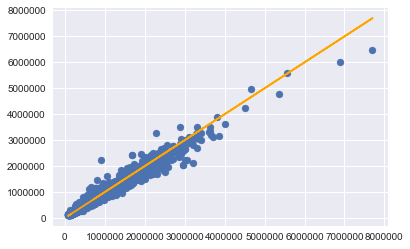

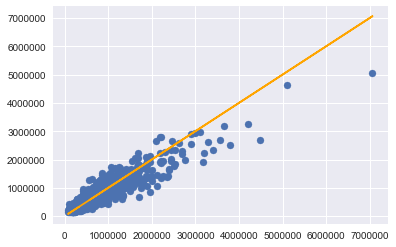

In [186]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
y_score = model.predict(X_test)

metric_report(y_pred, y_score)

Decent Performance but heavily overfit, let's try something else. Tried a bunch of models, GradientBoostingRegressor works best. 

E:\Conda2\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TRAIN SET:
Exp'd Variance: 0.8711085551146421
MAE: 80307.93070306416
RMSE: 130250.25381864425
Max Error: 1540998.4128925428

TEST SET:
Exp'd Variance: 0.8567136799159184
MAE: 84463.82322376654
RMSE: 144616.78241865372
Max Error: 1678345.553418524


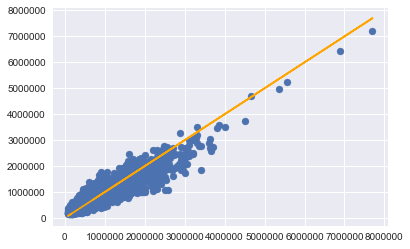

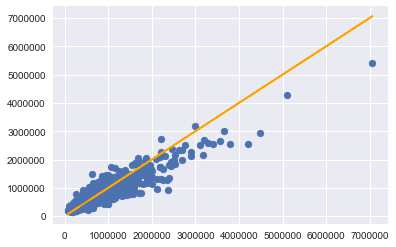

In [187]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
y_score = model.predict(X_test)

metric_report(y_pred, y_score)

What happens when we scale our Y axis variable as well? Let's try log transforming it. 

In [188]:
y = np.log(y)
y_train=np.log(y_train)
y_test = np.log(y_test)

E:\Conda2\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TRAIN SET:
Exp'd Variance: 0.8669560709111979
MAE: 0.14108973189836616
RMSE: 0.19146836048434757
Max Error: 1.2513712909338341

TEST SET:
Exp'd Variance: 0.8565018122772347
MAE: 0.14737908128236393
RMSE: 0.20157911725224748
Max Error: 1.0262695969786524


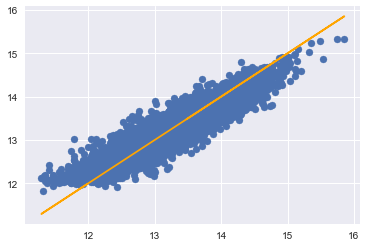

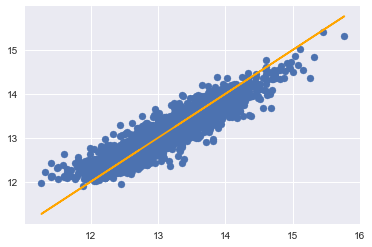

In [189]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
y_score = model.predict(X_test)

metric_report(y_pred, y_score)

Since Each Zipcode represents a specific area on a map, let's try one hot encoding it to seee if our performance improves. 

In [196]:
X_dummies=pd.get_dummies(X.zipcode)
X=pd.concat([X, X_dummies], axis=1)

E:\Conda2\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TRAIN SET:
Exp'd Variance: 0.8686909765789115
MAE: 0.1399197973114993
RMSE: 0.1901393492854846
Max Error: 1.221142591071775

TEST SET:
Exp'd Variance: 0.8641190935678416
MAE: 0.14311720144017495
RMSE: 0.19657348626279425
Max Error: 1.0829354143117165


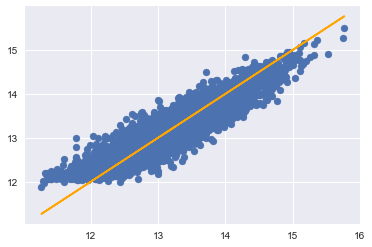

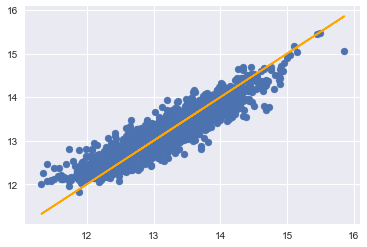

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_int,y, test_size = .2)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
y_score = model.predict(X_test)

metric_report(y_pred, y_score)

Let's get a mapping of where exactly everything is and then try to cluster the data in a useful way. 

In [192]:
Xy = X.merge(y, on=X.index)
Xy.head()

key_0  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0      0 -0.022622  -0.148789    -0.068364 -0.043562 -0.197448         0.0   
1      1 -0.022622   0.017878     0.037178 -0.012775  0.202552         0.0   
2      2 -0.138585  -0.148789    -0.099496  0.027244 -0.197448         0.0   
3      3  0.059655   0.117878    -0.009139 -0.058719 -0.197448         0.0   
4      4 -0.022622  -0.015456    -0.030399  0.000804 -0.197448         0.0   

       view  condition     grade  ...  zipcode       lat      long  \
0 -0.058332  -0.069086 -0.053542  ...    98178 -0.079091 -0.035845   
1 -0.058332  -0.069086 -0.053542  ...    98125  0.258371 -0.087340   
2 -0.058332  -0.069086 -0.158669  ...    98028  0.285555 -0.015911   
3 -0.058332   0.248308 -0.053542  ...    98136 -0.063649 -0.148801   
4 -0.058332  -0.069086  0.037522  ...    98074  0.090766  0.140235   

   sqft_living15  sqft_lot15    yr  mo   d  d_o_y      price  
0      -0.123578   -0.008136  2014  10  13    317  12.309982  
1      -0.039038   -0.005851  2014  12   9    374  13.195614  
2       0.134336   -0.005365  2015   2  25     84  12.100712  
3      -0.118181   -0.008882  2014  12   9    374  13.311329  
4      -0.016066   -0.006007  2015   2  18     77  13.142166  

[5 rows x 24 columns]

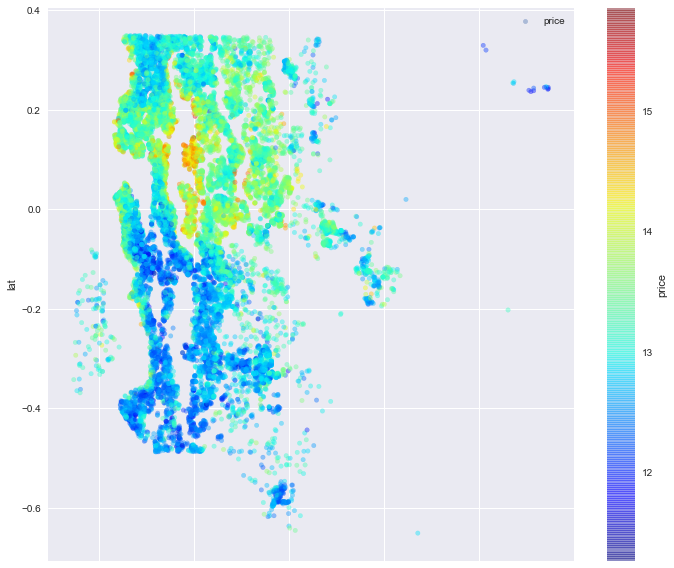

In [198]:
Xy.plot(kind='scatter', 
        x='long', y='lat', 
        alpha=0.4,
        label='price', 
        figsize=(10,8),
        c='price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.tight_layout()
plt.show()

In [207]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,20))

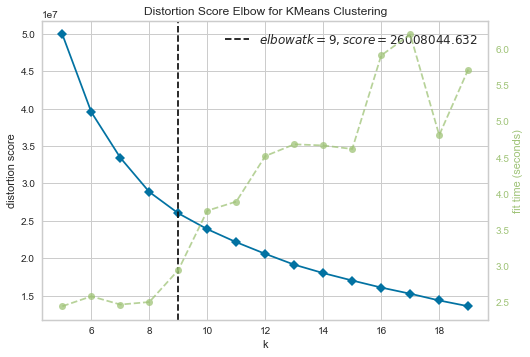

In [208]:
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        

Seems like the best number of clusters is around 9. Let's try clustering the data and see how our clusters perform. 

In [217]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=9, random_state=0).fit(df[['lat', 'long']])

Xy['cluster'] = clusters.labels_

In [218]:
Xy.head()

key_0  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0      0 -0.022622  -0.148789    -0.068364 -0.043562 -0.197448         0.0   
1      1 -0.022622   0.017878     0.037178 -0.012775  0.202552         0.0   
2      2 -0.138585  -0.148789    -0.099496  0.027244 -0.197448         0.0   
3      3  0.059655   0.117878    -0.009139 -0.058719 -0.197448         0.0   
4      4 -0.022622  -0.015456    -0.030399  0.000804 -0.197448         0.0   

       view  condition     grade  ...       lat      long  sqft_living15  \
0 -0.058332  -0.069086 -0.053542  ... -0.079091 -0.035845      -0.123578   
1 -0.058332  -0.069086 -0.053542  ...  0.258371 -0.087340      -0.039038   
2 -0.058332  -0.069086 -0.158669  ...  0.285555 -0.015911       0.134336   
3 -0.058332   0.248308 -0.053542  ... -0.063649 -0.148801      -0.118181   
4 -0.058332  -0.069086  0.037522  ...  0.090766  0.140235      -0.016066   

   sqft_lot15    yr  mo   d  d_o_y      price  cluster  
0   -0.008136  2014  10  13    317  12.309982        8  
1   -0.005851  2014  12   9    374  13.195614        4  
2   -0.005365  2015   2  25     84  12.100712        4  
3   -0.008882  2014  12   9    374  13.311329        8  
4   -0.006007  2015   2  18     77  13.142166        7  

[5 rows x 25 columns]

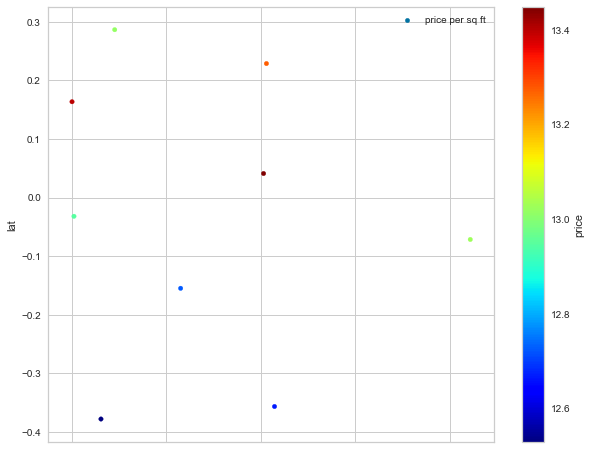

In [220]:
gp = Xy.groupby('cluster').mean()[['lat', 'long', 'price']]
clust = gp.index.map(str).tolist()
gp.plot(kind='scatter', 
        x='long', y='lat', 
        alpha=1,
        DistanceMetric=
        label='price per sq ft', 
        figsize=(10,8),
        c='price', 
        cmap=plt.get_cmap('jet'), 
        colorbar=True)
# plt.text(gp['long'].tolist(), gp['lat'].tolist(), clust, fontsize=9)
# plt.tight_layout()
plt.show()

In [221]:
cluster_dummies = pd.get_dummies(Xy.cluster)

In [227]:
Xy_cluster_dum = pd.concat([Xy, cluster_dummies], axis=1)
X_clust = Xy_clust_dum.drop('price', axis=1)
y = Xy_clust_dum.price

TRAIN SET:
Exp'd Variance: 0.8931650283091697
MAE: 0.126217214571735
RMSE: 0.17213711251158118
Max Error: 1.2008127503703694

TEST SET:
Exp'd Variance: 0.887241221210344
MAE: 0.12999102678783847
RMSE: 0.17642831101144457
Max Error: 1.1710562143966818


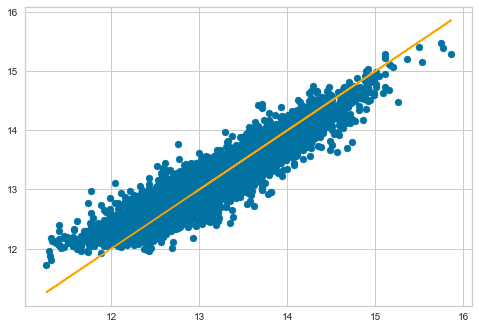

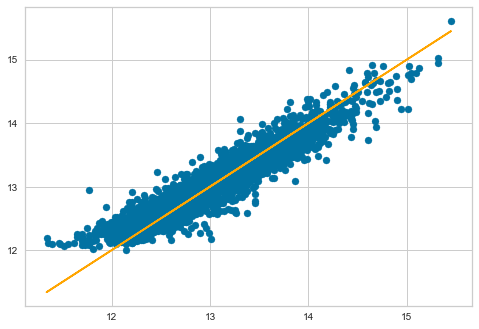

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
y_score = model.predict(X_test)

metric_report(y_pred, y_score)

In [236]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, max_error, mean_squared_error


def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

def report_metrics(y_true, y_pred):
    print("Expl'd Var:", explained_variance_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("Max Error:", max_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAPE:", mape(y_true, y_pred))
    plt.figure(figsize=(8,8))
    plt.scatter(y_true, y_pred)
    sns.lineplot(y_true, y_true, color='orange')
    plt.show()

In [234]:
from pygam import ExpectileGAM

# lets fit the mean model first by CV
gam50 = ExpectileGAM(expectile=0.5).gridsearch(X_train.values, y_train.values)

# and copy the smoothing to the other models
lam = gam50.lam

# now fit a few more models
gam95 = ExpectileGAM(expectile=0.95, lam=lam).fit(X_train.values, y_train.values)
gam75 = ExpectileGAM(expectile=0.75, lam=lam).fit(X_train.values, y_train.values)
gam25 = ExpectileGAM(expectile=0.25, lam=lam).fit(X_train.values, y_train.values)
gam05 = ExpectileGAM(expectile=0.05, lam=lam).fit(X_train.values, y_train.values)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:16 ETA:   0:02:46
 18% (2 of 11) |####                     | Elapsed Time: 0:00:30 ETA:   0:02:05
 27% (3 of 11) |######                   | Elapsed Time: 0:00:44 ETA:   0:01:51
 36% (4 of 11) |#########                | Elapsed Time: 0:00:58 ETA:   0:01:38
 45% (5 of 11) |###########              | Elapsed Time: 0:01:12 ETA:   0:01:24
 54% (6 of 11) |#############            | Elapsed Time: 0:01:27 ETA:   0:01:12
 63% (7 of 11) |###############          | Elapsed Time: 0:01:41 ETA:   0:00:56
 72% (8 of 11) |##################       | Elapsed Time: 0:01:54 ETA:   0:00:40
 81% (9 of 11) |####################     | Elapsed Time: 0:02:08 ETA:   0:00:27
 90% (10 of 11) |#####################   | Elapsed Time: 0:02:22 ETA:   0:00:13
100% (11 of 11) |########################| Elapsed Time: 0:02:36 Time:  0:02:36


Expl'd Var: 0.9014992741011889
MAE: 0.11943467514765636
Max Error: 1.1850457202644922
RMSE: 0.16501796945815977
MAPE: 0.009173527809392141


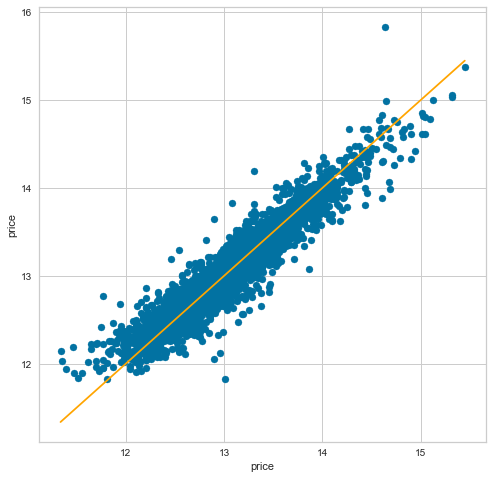

In [237]:
gams = [gam05, gam25, gam50, gam75, gam95]
y_pred = 0
for gam in gams:
    y_pred += gam.predict(X_test.values) / len(gams)
report_metrics(y_test, y_pred)

Stuff below still a Work in progress, Boke 90% though :)


Decent improvement from low 70's

In [259]:
from pyod.models.iforest import IForest
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

In [260]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.01

clfs = [
    IForest(contamination=outliers_fraction, 
            random_state=random_state),
    PCA(contamination=outliers_fraction, 
        random_state=random_state),
    OCSVM(contamination=outliers_fraction),
    MCD(contamination=outliers_fraction, 
        random_state=random_state)
]

y_out = 0
for clf in clfs:
    clf.fit(X[X.waterfront == 0])
    y_pred = clf.predict(X_train)
    print(pd.Series(y_pred).value_counts())
    y_out += y_pred

E:\Conda2\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X_train['price'] = y_train
X_train['outlier'] = (y_out > 0).astype(np.int)
X_train['outlier'].value_counts()

In [245]:
X_train[X_train.outlier == 0].describe()

bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  16216.000000  16216.000000  16216.000000  16216.000000  16216.000000   
mean      -0.000510     -0.002581     -0.002299     -0.003235     -0.001148   
std        0.079735      0.097647      0.064480      0.106521      0.214954   
min       -0.336825     -0.215456     -0.129868     -0.339419     -0.197448   
25%       -0.022622     -0.048789     -0.049382     -0.057731     -0.197448   
50%       -0.022622      0.017878     -0.013695     -0.007437      0.002552   
75%        0.059655      0.051211      0.033382      0.033295      0.202552   
max        0.663175      0.717878      0.397847      0.617291      0.802552   

         waterfront          view     condition         grade    sqft_above  \
count  16216.000000  16216.000000  16216.000000  16216.000000  16216.000000   
mean       0.004687     -0.007919      0.000731     -0.001816     -0.002183   
std        0.068301      0.175849      0.112488      0.099768      0.129594   
min        0.000000     -0.058332     -0.751692     -0.631375     -0.457934   
25%        0.000000     -0.058332     -0.069086     -0.053542     -0.096934   
50%        0.000000     -0.058332     -0.069086     -0.053542     -0.013272   
75%        0.000000     -0.058332      0.109661      0.037522      0.091553   
max        1.000000      0.941668      0.248308      0.368625      0.464452   

       ...         98166         98168         98177         98178  \
count  ...  16216.000000  16216.000000  16216.000000  16216.000000   
mean   ...      0.011902      0.012704      0.011717      0.011223   
std    ...      0.108448      0.111995      0.107612      0.105348   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

              98188         98198         98199       cluster         price  \
count  16216.000000  16216.000000  16216.000000  16216.000000  12709.000000   
mean       0.005488      0.011778      0.013259      3.966453     13.050181   
std        0.073882      0.107891      0.114383      2.835045      0.529914   
min        0.000000      0.000000      0.000000      0.000000     11.264464   
25%        0.000000      0.000000      0.000000      1.000000     12.680753   
50%        0.000000      0.000000      0.000000      4.000000     13.017003   
75%        0.000000      0.000000      0.000000      7.000000     13.377006   
max        1.000000      1.000000      1.000000      8.000000     15.856731   

       outlier  
count  16216.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

[8 rows x 95 columns]

AttributeError: 'DataFrame' object has no attribute 'price'

In [250]:
# X_train = X_train[X_train.outlier == 0]
# y_train = X_train['price']
# X_train = X_train.drop('price', axis=1)



In [252]:
y_train

12412    13.523820
13550    13.465953
15355    13.171154
17125    12.474534
15007    13.361380
3927     13.367660
4167     13.336668
19573          NaN
16909          NaN
11570    12.301383
2872     13.437948
15600    13.132314
17363          NaN
10331    13.126355
13296    12.875183
20833    13.741853
13711    12.894082
18135    13.504219
843      12.524526
6342     12.524345
7788           NaN
5423     13.304685
2651     12.911642
20644    13.337475
10552    13.586097
6354           NaN
11760          NaN
8540     12.788288
21058          NaN
7526           NaN
           ...    
6815           NaN
829            NaN
1404     14.122995
20278    12.926348
2021     13.357435
4572     12.834681
12213    12.779873
7124     12.834681
5209     13.077366
1299     13.151922
21259          NaN
21072    12.319401
19406          NaN
8713     12.205823
732      13.458550
4389     13.068963
8599     12.765688
20252          NaN
6136     13.997832
5051           NaN
8627     13.270783
17932    13.

In [251]:
# lets fit the mean model first by CV
gam50 = ExpectileGAM(expectile=0.5).gridsearch(X_train.values, y_train.values)

# and copy the smoothing to the other models
lam = gam50.lam

# now fit a few more models
gam95 = ExpectileGAM(expectile=0.95, lam=lam).fit(X_train.values, y_train.values)
gam75 = ExpectileGAM(expectile=0.75, lam=lam).fit(X_train.values, y_train.values)
gam25 = ExpectileGAM(expectile=0.25, lam=lam).fit(X_train.values, y_train.values)
gam05 = ExpectileGAM(expectile=0.05, lam=lam).fit(X_train.values, y_train.values)

ValueError: y data must not contain Inf nor NaN